***

<center><u><H1>Exploratory Data Analysis</H1></u></center>

***

Per questo primo assaggio di analisi di un dataset, scarichiamo il dataset "automobile.csv" da questo [link](https://archive.ics.uci.edu/ml/datasets/Automobile?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01). Si tratta di un dataset fornito da Jeffrey C. Schlimmer in formato csv dove:
- ognuna delle 205 righe rappresenta un'osservazione;
- ci sono 26 feature per osservazione.

Il dataset è disponibile anche nella pagina del corso su [VLE](https://virtuale.unibo.it/). Le feature di questo dataset sono le seguenti:
- **symboling**: un valore che indica il rischio assicurativo della macchina (+3 è il rischio maggiore e -3 è il rischio minore);
- **normalized-losses**: una sorta di misura dell'usura dell'auto normalizzata ad altre auto;
- **make**: costruttore;
- **fuel-type**: tipo di carburante (gasolio o diesel);
- **aspiration**: indica se la vettura è aspirata oppure no;
- **num-of-doors**: numero di porte;
- **body-style**: tipo di vettura (convertible -> decappottabile, hatchback -> berlina compatta, sedan -> berlina, hardtop -> tettuccio rigido);
- **drive-wheels**: ruote motrici (fwd -> anteriore, rwd -> posteriore, 4wd -> 4 ruote motrici);
- **engine-location**: posizione del motore;
- **wheel-base**: distance tra l'asse anteriore e l'asse posteriore (pollici);
- **length**: lunghezza (pollici);
- **width**: larghezza (pollici);
- **height**: altezza (pollici);
- **curb-weight**: peso con pieno carico di carburante (libbre);
- **engine-type**: tipo di motore  (ad esempio: dohc -> dual overhead cam engine, ohcv -> overhead valve engine);
- **num-of-cylinders**: numero di cilindri;
- **engine-size**: dimensioni del motore (pollici cubi);
- **fuel-system**: metodologia di immissione del carburante (ad esempio: mpfi -> multi-point fuel injection);
- **bore**: alesaggio (diametro della sezione interna del cilindro, misurato in pollici);
- **stroke**: corsa (distance tra punto morto inferiore e punto morto superiore di un cilindro, in pollici);
- **compression-ratio**: rapporto di compressione (un indice di funzionamento della macchina termica);
- **horsepower**: cavalli;
- **peak-rpm**: massimo numero di giri per minuto;
- **city-mpg**: miglia per gallone in città;
- **highway-mpg**: miglia per gallone in autostrada;
- **price**: prezzo in dollari.

# 1 Esplorazione del dataset con il modulo Pandas

Prima di tutto, importiamo i moduli necessari:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('pastel')

A questo punto, possiamo leggere il file. Attenzione: se il file è in formato .csv, nessun problema. Qualora fosse un file Excel, è possibile che Pandas richieda l'installazione del **modulo [openpyxl](https://openpyxl.readthedocs.io/en/stable/)**. Nel nostro caso, il file è in formato .csv quindi possiamo procedere:

In [3]:
df = pd.read_csv("00_datasets/automobile.csv")

Una volta importati i dati, possiamo usare gli strumenti messi a disposizione dalla classe DataFrame per capire un po' meglio il dataset da analizzare tramite i metodi [head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) e [tail()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html):

In [3]:
df.head(5)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [4]:
df.tail(5)

symboling normalized-losses   make fuel-type aspiration num-of-doors  \
200         -1                95  volvo       gas        std         four   
201         -1                95  volvo       gas      turbo         four   
202         -1                95  volvo       gas        std         four   
203         -1                95  volvo    diesel      turbo         four   
204         -1                95  volvo       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
200      sedan          rwd           front       109.1  ...          141   
201      sedan          rwd           front       109.1  ...          141   
202      sedan          rwd           front       109.1  ...          173   
203      sedan          rwd           front       109.1  ...          145   
204      sedan          rwd           front       109.1  ...          141   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
200         mpfi  3.78    3.15               9.5        114      5400   
201         mpfi  3.78    3.15               8.7        160      5300   
202         mpfi  3.58    2.87               8.8        134      5500   
203          idi  3.01     3.4              23.0        106      4800   
204         mpfi  3.78    3.15               9.5        114      5400   

    city-mpg highway-mpg  price  
200       23          28  16845  
201       19          25  19045  
202       18          23  21485  
203       26          27  22470  
204       19          25  22625  

[5 rows x 26 columns]

In [5]:
df.shape

(205, 26)

Quando si analizza un dataset, una delle prime cose da fare è ottenere delle informazioni di base sul dataframe:
- il metodo [info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) permette di visualizzare un breve riassunto del dataframe. Con **verbose = True** stampiamo un riassunto completo invece di una sola parte delle informazioni:

In [6]:
df.info(verbose=True) # con verbose=False, vengono fornite informazioni di base sulle feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

- il metodo [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) fornisce un riassunto delle variabili numeriche:

In [7]:
df.describe()

symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    16.000000  
25%    2145.000000    97.000000           8.600000   19.000000    25.000000  
50%    2414.000000   120.000000           9.000000   24.000000    30.000000  
75%    2935.000000   141.000000           9.400000   30.000000    34.000000  
max    4066.000000   326.000000          23.000000   49.000000    54.000000

- il metodo describe() permette anche di visualizzare un riassunto delle variabili non numeriche quando indichiamo di includere nell'analisi i dati ti tipo **object**:

In [8]:
df.describe(include='object')

normalized-losses    make fuel-type aspiration num-of-doors body-style  \
count                205     205       205        205          205        205   
unique                52      22         2          2            3          5   
top                    ?  toyota       gas        std         four      sedan   
freq                  41      32       185        168          114         96   

       drive-wheels engine-location engine-type num-of-cylinders fuel-system  \
count           205             205         205              205         205   
unique            3               2           7                7           8   
top             fwd           front         ohc             four        mpfi   
freq            120             202         148              159          94   

        bore stroke horsepower peak-rpm price  
count    205    205        205      205   205  
unique    39     37         60       24   187  
top     3.62    3.4         68     5500     ?  
freq      23     20         19       37     4

# 2 Data cleaning

Il primo step da implementare è relativo al pre-processing e, in particolare, la pulizia dei dati come abbiamo visto nella lezione precedente. Applichiamo quindi quei concetti al nuovo dataset che stiamo considerando.

## 2.1 Dati mancanti

Per prima cosa, analizziamo la presenza di dati errati. Come abbiamo visto, infatti, ci potrebbero essere dei valori di alcune feature che sono riconosciuti come un dato corretto ma in realtà sarebbe un dato mancante (nella lezione precedente era il carattere '?' nella feature 'Country'):

In [9]:
df_columns = df.columns

for col in df_columns:
    print(col)
    print(df[col].unique())
    print("-"*40)

symboling
[ 3  1  2  0 -1 -2]
----------------------------------------
normalized-losses
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
----------------------------------------
make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
----------------------------------------
fuel-type
['gas' 'diesel']
----------------------------------------
aspiration
['std' 'turbo']
----------------------------------------
num-of-doors
['two' 'four' '?']
----------------------------------------
body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
------------------------------

Da questa stampa, possiamo notare che:
- 'normalized-losses' sarebbe una variabile numerica, ma data la presenza del punto interrogativo viene importata come una stringa. Qui dobbiamo sicuramente inserire un nan e poi convertire il dato in integer quando passeremo alla trasformazione dei dati;
- 'make' non presenta caratteri strani, ma alcune categorie sono errate. Correggiamo 'alfa-romero' in 'alfa-romeo' e 'peugot' in 'peugeot';
- 'num-of-doors' è indicata come categorica (non ci sono i numeri ma le stringhe), ma presenta dei '?' da correggere in nan;
- 'peak-rpm' e 'price' presentano dei '?' da correggere in nan e in fase di trasformazione dei dati la convertiremo in un integer.

Per comodità, applichiamo sia i nan sia le trasformazioni dei dati elencate sopra in modo preliminare e stampiamo di nuovo i dati riassuntivi. Ci sono anche altre feature che sono numeriche ma salvata come stringhe...applichiamo anche a loro la conversione.

In [182]:
df.replace(to_replace = '?', value = np.nan, inplace = True)

Controlliamo che non ci siano più i punti interrogativi:

In [11]:
for col in df_columns:
    print(col)
    print(df[col].unique())
    print("-"*40)

symboling
[ 3  1  2  0 -1 -2]
----------------------------------------
normalized-losses
[nan '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
----------------------------------------
make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
----------------------------------------
fuel-type
['gas' 'diesel']
----------------------------------------
aspiration
['std' 'turbo']
----------------------------------------
num-of-doors
['two' 'four' nan]
----------------------------------------
body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
------------------------------

Ora possiamo cambiare le stringhe sbagliate nella feature 'make' e convertire i data type per 'normalized-losses', 'price' e 'peak-rpm':

In [183]:
df.replace(to_replace = 'alfa-romero', value = 'alfa-romeo', inplace = True)
df.replace(to_replace = 'peugot', value = 'peugeot', inplace = True)

In [184]:
df[['normalized-losses', 'price', 'peak-rpm', 'horsepower', 'stroke', 'bore']] = df[['normalized-losses', 'price', 'peak-rpm', 'horsepower', 'stroke', 'bore']].apply(pd.to_numeric)

Vediamo se le modifiche hanno avuto effetto e stampiamo i dati riassuntivi:

In [14]:
for col in df_columns:
    print(col)
    print(df[col].unique())
    print("-"*40)

symboling
[ 3  1  2  0 -1 -2]
----------------------------------------
normalized-losses
[ nan 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 122. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.
  87.  77.  91. 134.  65. 197.  90.  94. 256.  95.]
----------------------------------------
make
['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
----------------------------------------
fuel-type
['gas' 'diesel']
----------------------------------------
aspiration
['std' 'turbo']
----------------------------------------
num-of-doors
['two' 'four' nan]
----------------------------------------
body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
----------------------------------------
drive-wheels
['rwd' 'fwd'

In [15]:
df.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  205.000000         164.000000  205.000000  205.000000  205.000000   
mean     0.834146         122.000000   98.756585  174.049268   65.907805   
std      1.245307          35.442168    6.021776   12.337289    2.145204   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  166.300000   64.100000   
50%      1.000000         115.000000   97.000000  173.200000   65.500000   
75%      2.000000         150.000000  102.400000  183.100000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb-weight  engine-size        bore      stroke  \
count  205.000000   205.000000   205.000000  201.000000  201.000000   
mean    53.724878  2555.565854   126.907317    3.329751    3.255423   
std      2.443522   520.680204    41.642693    0.273539    0.316717   
min     47.800000  1488.000000    61.000000    2.540000    2.070000   
25%     52.000000  2145.000000    97.000000    3.150000    3.110000   
50%     54.100000  2414.000000   120.000000    3.310000    3.290000   
75%     55.500000  2935.000000   141.000000    3.590000    3.410000   
max     59.800000  4066.000000   326.000000    3.940000    4.170000   

       compression-ratio  horsepower     peak-rpm    city-mpg  highway-mpg  \
count         205.000000  203.000000   203.000000  205.000000   205.000000   
mean           10.142537  104.256158  5125.369458   25.219512    30.751220   
std             3.972040   39.714369   479.334560    6.542142     6.886443   
min             7.000000   48.000000  4150.000000   13.000000    16.000000   
25%             8.600000   70.000000  4800.000000   19.000000    25.000000   
50%             9.000000   95.000000  5200.000000   24.000000    30.000000   
75%             9.400000  116.000000  5500.000000   30.000000    34.000000   
max            23.000000  288.000000  6600.000000   49.000000    54.000000   

              price  
count    201.000000  
mean   13207.129353  
std     7947.066342  
min     5118.000000  
25%     7775.000000  
50%    10295.000000  
75%    16500.000000  
max    45400.000000

In [16]:
df.describe(include='object')

make fuel-type aspiration num-of-doors body-style drive-wheels  \
count      205       205        205          203        205          205   
unique      22         2          2            2          5            3   
top     toyota       gas        std         four      sedan          fwd   
freq        32       185        168          114         96          120   

       engine-location engine-type num-of-cylinders fuel-system  
count              205         205              205         205  
unique               2           7                7           8  
top              front         ohc             four        mpfi  
freq               202         148              159          94

### 2.1.1 Identificazione dei dati mancanti

Uno dei punti chiave nell'analisi dei dati risiede nel pre-processing e, in questo contesto, la gestione dei dati mancanti è fondamentale. In generale, qualsiasi dato mancante va gestito nel modo più opportuno, ma questo puù essere ancora più critico se si tratta della variabile da predire.

Come abbiamo visto nella lezione precedente, possiamo individuare i dati mancanti tramite il metodo [isnull()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html):

In [17]:
missing_data = df.isnull() # ritorna un dataframe con valori logici (True corrisponde ad un dato mancante)
missing_data

symboling  normalized-losses   make  fuel-type  aspiration  num-of-doors  \
0        False               True  False      False       False         False   
1        False               True  False      False       False         False   
2        False               True  False      False       False         False   
3        False              False  False      False       False         False   
4        False              False  False      False       False         False   
..         ...                ...    ...        ...         ...           ...   
200      False              False  False      False       False         False   
201      False              False  False      False       False         False   
202      False              False  False      False       False         False   
203      False              False  False      False       False         False   
204      False              False  False      False       False         False   

     body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0         False         False            False       False  ...        False   
1         False         False            False       False  ...        False   
2         False         False            False       False  ...        False   
3         False         False            False       False  ...        False   
4         False         False            False       False  ...        False   
..          ...           ...              ...         ...  ...          ...   
200       False         False            False       False  ...        False   
201       False         False            False       False  ...        False   
202       False         False            False       False  ...        False   
203       False         False            False       False  ...        False   
204       False         False            False       False  ...        False   

     fuel-system   bore  stroke  compression-ratio  horsepower  peak-rpm  \
0          False  False   False              False       False     False   
1          False  False   False              False       False     False   
2          False  False   False              False       False     False   
3          False  False   False              False       False     False   
4          False  False   False              False       False     False   
..           ...    ...     ...                ...         ...       ...   
200        False  False   False              False       False     False   
201        False  False   False              False       False     False   
202        False  False   False              False       False     False   
203        False  False   False              False       False     False   
204        False  False   False              False       False     False   

     city-mpg  highway-mpg  price  
0       False        False  False  
1       False        False  False  
2       False        False  False  
3       False        False  False  
4       False        False  False  
..        ...          ...    ...  
200     False        False  False  
201     False        False  False  
202     False        False  False  
203     False        False  False  
204     False        False  False  

[205 rows x 26 columns]

In [18]:
for column in df_columns:
    n_missing = sum(missing_data[column])
    if n_missing>0:
        print(f"{column}: {n_missing/df.shape[0]:.4%} ({n_missing} su {df.shape[0]}) mancanti.")

normalized-losses: 20.0000% (41 su 205) mancanti.
num-of-doors: 0.9756% (2 su 205) mancanti.
bore: 1.9512% (4 su 205) mancanti.
stroke: 1.9512% (4 su 205) mancanti.
horsepower: 0.9756% (2 su 205) mancanti.
peak-rpm: 0.9756% (2 su 205) mancanti.
price: 1.9512% (4 su 205) mancanti.


### 2.1.2 Gestione dei dati mancanti

Per prima cosa, ragioniamo su cosa rappresenta la feature e sulla quantità di dati mancanti:
- normalized-losses: 41 dati mancanti su 205 è un valore abbastanza alto, ma per semplicità sostituiamo con la media
- stroke, bore, horsepower, peak-rpm: hanno pochissimi dati mancanti e sono di tipo numerico, quindi qui possiamo sicuramente sostituire con la media
- num-of-doors: abbiamo 2 dati mancanti, ma è una variabile non numerica e, come tale, va sostituita con il valore più frequente (invece che con la media)
- price: ha solamente 4 dati mancanti, ma è la variabile da predire (in un eventuale progetto di ML). Per questo motivo, ha molto più senso eliminare quelle osservazioni per evitare di introdurre dei bias nell'analisi.

Per le operazioni di sostituzione, ci occorre la classe **SimpleImputer** del modulo **impute** di Scikit-Learn (documentazione a [questo link](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)):

In [185]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # creiamo l'oggetto indicando la media come valore
df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']] = imputer.fit_transform(df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']])

In [186]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 
df[['num-of-doors']] = imputer.fit_transform(df[['num-of-doors']])

In [187]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.shape

(201, 26)

In [188]:
missing_data = df.isnull()
for column in df_columns:
    n_missing = sum(missing_data[column])
    if n_missing>0:
        print(f"{column}: {n_missing/df.shape[0]:.4%} ({n_missing} su {df.shape[0]}) mancanti.")

KeyError: 'city-kml'

Dopo le operazioni svolte, sembra non esserci più alcun dato mancante e possiamo procedere con le prossime analisi. Attenzione però: avendo eliminato alcune osservazioni, occorre resettare l'indice!

In [189]:
df.reset_index(drop=True, inplace=True)
df

symboling  normalized-losses        make fuel-type aspiration  \
0            3              122.0  alfa-romeo       gas        std   
1            3              122.0  alfa-romeo       gas        std   
2            1              122.0  alfa-romeo       gas        std   
3            2              164.0        audi       gas        std   
4            2              164.0        audi       gas        std   
..         ...                ...         ...       ...        ...   
196         -1               95.0       volvo       gas        std   
197         -1               95.0       volvo       gas      turbo   
198         -1               95.0       volvo       gas        std   
199         -1               95.0       volvo    diesel      turbo   
200         -1               95.0       volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
196         four        sedan          rwd           front       109.1  ...   
197         four        sedan          rwd           front       109.1  ...   
198         four        sedan          rwd           front       109.1  ...   
199         four        sedan          rwd           front       109.1  ...   
200         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0      111.0   
1            130         mpfi  3.47    2.68               9.0      111.0   
2            152         mpfi  2.68    3.47               9.0      154.0   
3            109         mpfi  3.19    3.40              10.0      102.0   
4            136         mpfi  3.19    3.40               8.0      115.0   
..           ...          ...   ...     ...               ...        ...   
196          141         mpfi  3.78    3.15               9.5      114.0   
197          141         mpfi  3.78    3.15               8.7      160.0   
198          173         mpfi  3.58    2.87               8.8      134.0   
199          145          idi  3.01    3.40              23.0      106.0   
200          141         mpfi  3.78    3.15               9.5      114.0   

     peak-rpm city-mpg  highway-mpg    price  
0      5000.0       21           27  13495.0  
1      5000.0       21           27  16500.0  
2      5000.0       19           26  16500.0  
3      5500.0       24           30  13950.0  
4      5500.0       18           22  17450.0  
..        ...      ...          ...      ...  
196    5400.0       23           28  16845.0  
197    5300.0       19           25  19045.0  
198    5500.0       18           23  21485.0  
199    4800.0       26           27  22470.0  
200    5400.0       19           25  22625.0  

[201 rows x 26 columns]

## 2.2 Trasformazione dei dati

### 2.2.1 Tipo di dato

Abbiamo già convertito il tipo di dato per le variabili che lo richiedevano.

### 2.2.2 Unità di misura

In questo dataset, ci sono numerose feature per le quali è opportuno convertire l'unità di misura per una interpretazione più semplice:
- wheel-base, length, width, height, bore e strole da pollici a centimetri;
- curb-weight da libbre a kg;
- engine-size da pollici cubi a centimetri cubi;
- city-mpg e highway-mpg da miglia per gallone a km per litro;
- price da dollari a euro.

In [190]:
df[['wheel-base', 'length', 'width', 'height', 'bore', 'stroke']] = df[['wheel-base', 'length', 'width', 'height', 'bore', 'stroke']] *  2.54
df

symboling  normalized-losses        make fuel-type aspiration  \
0            3              122.0  alfa-romeo       gas        std   
1            3              122.0  alfa-romeo       gas        std   
2            1              122.0  alfa-romeo       gas        std   
3            2              164.0        audi       gas        std   
4            2              164.0        audi       gas        std   
..         ...                ...         ...       ...        ...   
196         -1               95.0       volvo       gas        std   
197         -1               95.0       volvo       gas      turbo   
198         -1               95.0       volvo       gas        std   
199         -1               95.0       volvo    diesel      turbo   
200         -1               95.0       volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front     225.044  ...   
1            two  convertible          rwd           front     225.044  ...   
2            two    hatchback          rwd           front     240.030  ...   
3           four        sedan          fwd           front     253.492  ...   
4           four        sedan          4wd           front     252.476  ...   
..           ...          ...          ...             ...         ...  ...   
196         four        sedan          rwd           front     277.114  ...   
197         four        sedan          rwd           front     277.114  ...   
198         four        sedan          rwd           front     277.114  ...   
199         four        sedan          rwd           front     277.114  ...   
200         four        sedan          rwd           front     277.114  ...   

     engine-size  fuel-system    bore  stroke compression-ratio horsepower  \
0            130         mpfi  8.8138  6.8072               9.0      111.0   
1            130         mpfi  8.8138  6.8072               9.0      111.0   
2            152         mpfi  6.8072  8.8138               9.0      154.0   
3            109         mpfi  8.1026  8.6360              10.0      102.0   
4            136         mpfi  8.1026  8.6360               8.0      115.0   
..           ...          ...     ...     ...               ...        ...   
196          141         mpfi  9.6012  8.0010               9.5      114.0   
197          141         mpfi  9.6012  8.0010               8.7      160.0   
198          173         mpfi  9.0932  7.2898               8.8      134.0   
199          145          idi  7.6454  8.6360              23.0      106.0   
200          141         mpfi  9.6012  8.0010               9.5      114.0   

     peak-rpm city-mpg  highway-mpg    price  
0      5000.0       21           27  13495.0  
1      5000.0       21           27  16500.0  
2      5000.0       19           26  16500.0  
3      5500.0       24           30  13950.0  
4      5500.0       18           22  17450.0  
..        ...      ...          ...      ...  
196    5400.0       23           28  16845.0  
197    5300.0       19           25  19045.0  
198    5500.0       18           23  21485.0  
199    4800.0       26           27  22470.0  
200    5400.0       19           25  22625.0  

[201 rows x 26 columns]

In [191]:
df['curb-weight'] = df['curb-weight'] * 2.205
df['engine-size'] = df['engine-size'] * 16.387
df[['city-mpg', 'highway-mpg']] = df[['city-mpg', 'highway-mpg']] / 2.352
df

symboling  normalized-losses        make fuel-type aspiration  \
0            3              122.0  alfa-romeo       gas        std   
1            3              122.0  alfa-romeo       gas        std   
2            1              122.0  alfa-romeo       gas        std   
3            2              164.0        audi       gas        std   
4            2              164.0        audi       gas        std   
..         ...                ...         ...       ...        ...   
196         -1               95.0       volvo       gas        std   
197         -1               95.0       volvo       gas      turbo   
198         -1               95.0       volvo       gas        std   
199         -1               95.0       volvo    diesel      turbo   
200         -1               95.0       volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front     225.044  ...   
1            two  convertible          rwd           front     225.044  ...   
2            two    hatchback          rwd           front     240.030  ...   
3           four        sedan          fwd           front     253.492  ...   
4           four        sedan          4wd           front     252.476  ...   
..           ...          ...          ...             ...         ...  ...   
196         four        sedan          rwd           front     277.114  ...   
197         four        sedan          rwd           front     277.114  ...   
198         four        sedan          rwd           front     277.114  ...   
199         four        sedan          rwd           front     277.114  ...   
200         four        sedan          rwd           front     277.114  ...   

     engine-size  fuel-system    bore  stroke compression-ratio horsepower  \
0       2130.310         mpfi  8.8138  6.8072               9.0      111.0   
1       2130.310         mpfi  8.8138  6.8072               9.0      111.0   
2       2490.824         mpfi  6.8072  8.8138               9.0      154.0   
3       1786.183         mpfi  8.1026  8.6360              10.0      102.0   
4       2228.632         mpfi  8.1026  8.6360               8.0      115.0   
..           ...          ...     ...     ...               ...        ...   
196     2310.567         mpfi  9.6012  8.0010               9.5      114.0   
197     2310.567         mpfi  9.6012  8.0010               8.7      160.0   
198     2834.951         mpfi  9.0932  7.2898               8.8      134.0   
199     2376.115          idi  7.6454  8.6360              23.0      106.0   
200     2310.567         mpfi  9.6012  8.0010               9.5      114.0   

     peak-rpm   city-mpg  highway-mpg    price  
0      5000.0   8.928571    11.479592  13495.0  
1      5000.0   8.928571    11.479592  16500.0  
2      5000.0   8.078231    11.054422  16500.0  
3      5500.0  10.204082    12.755102  13950.0  
4      5500.0   7.653061     9.353741  17450.0  
..        ...        ...          ...      ...  
196    5400.0   9.778912    11.904762  16845.0  
197    5300.0   8.078231    10.629252  19045.0  
198    5500.0   7.653061     9.778912  21485.0  
199    4800.0  11.054422    11.479592  22470.0  
200    5400.0   8.078231    10.629252  22625.0  

[201 rows x 26 columns]

Visto che abbiamo cambiato il significato delle feature dei consumi, modifichiamone il nome. Si può ricorrere al metodo [rename()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html):

In [192]:
df.rename(columns = {'city-mpg': 'city-kml', 'highway-mpg': 'highway-kml'}, inplace = True)
df_columns = df.columns
df_columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-kml',
       'highway-kml', 'price'],
      dtype='object')

## 2.3 Outlier

Per l'analisi degli outlier, consideriamo le variabili numeriche e valutiamo visivamente e numericamente come visto nella lezione precedente. Per comodità, creiamo un dataset che contiene solo le variabili numeriche, in modo da non dover selezionare ogni volta le colonne:

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    float64
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [28]:
df_numeric = df[['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-kml', 'highway-kml', 'price']]
df_numeric

symboling  normalized-losses  wheel-base   length    width   height  \
0            3              122.0     225.044  428.752  162.814  123.952   
1            3              122.0     225.044  428.752  162.814  123.952   
2            1              122.0     240.030  434.848  166.370  133.096   
3            2              164.0     253.492  448.564  168.148  137.922   
4            2              164.0     252.476  448.564  168.656  137.922   
..         ...                ...         ...      ...      ...      ...   
196         -1               95.0     277.114  479.552  175.006  140.970   
197         -1               95.0     277.114  479.552  174.752  140.970   
198         -1               95.0     277.114  479.552  175.006  140.970   
199         -1               95.0     277.114  479.552  175.006  140.970   
200         -1               95.0     277.114  479.552  175.006  140.970   

     curb-weight  engine-size    bore  stroke  compression-ratio  horsepower  \
0       5618.340     2130.310  8.8138  6.8072                9.0       111.0   
1       5618.340     2130.310  8.8138  6.8072                9.0       111.0   
2       6224.715     2490.824  6.8072  8.8138                9.0       154.0   
3       5153.085     1786.183  8.1026  8.6360               10.0       102.0   
4       6226.920     2228.632  8.1026  8.6360                8.0       115.0   
..           ...          ...     ...     ...                ...         ...   
196     6509.160     2310.567  9.6012  8.0010                9.5       114.0   
197     6723.045     2310.567  9.6012  8.0010                8.7       160.0   
198     6641.460     2834.951  9.0932  7.2898                8.8       134.0   
199     7093.485     2376.115  7.6454  8.6360               23.0       106.0   
200     6751.710     2310.567  9.6012  8.0010                9.5       114.0   

     peak-rpm   city-kml  highway-kml    price  
0      5000.0   8.928571    11.479592  13495.0  
1      5000.0   8.928571    11.479592  16500.0  
2      5000.0   8.078231    11.054422  16500.0  
3      5500.0  10.204082    12.755102  13950.0  
4      5500.0   7.653061     9.353741  17450.0  
..        ...        ...          ...      ...  
196    5400.0   9.778912    11.904762  16845.0  
197    5300.0   8.078231    10.629252  19045.0  
198    5500.0   7.653061     9.778912  21485.0  
199    4800.0  11.054422    11.479592  22470.0  
200    5400.0   8.078231    10.629252  22625.0  

[201 rows x 16 columns]

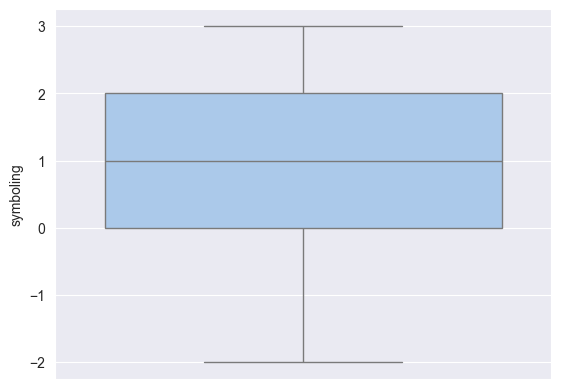

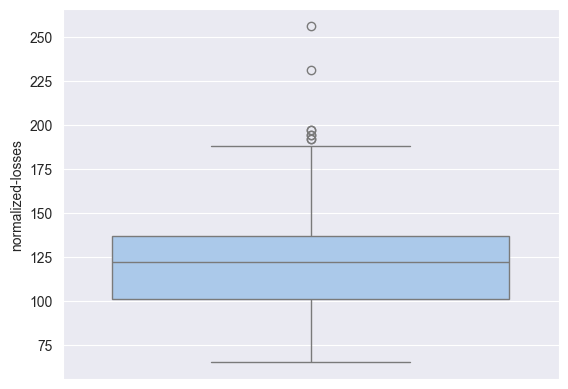

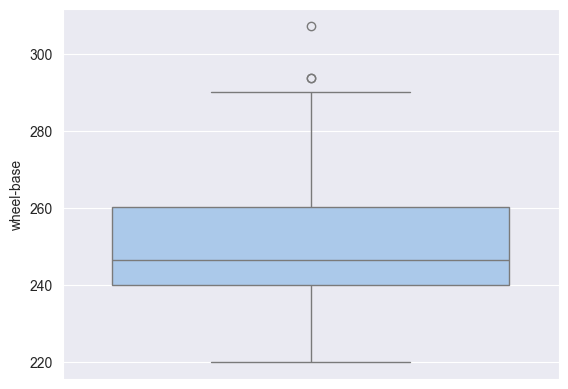

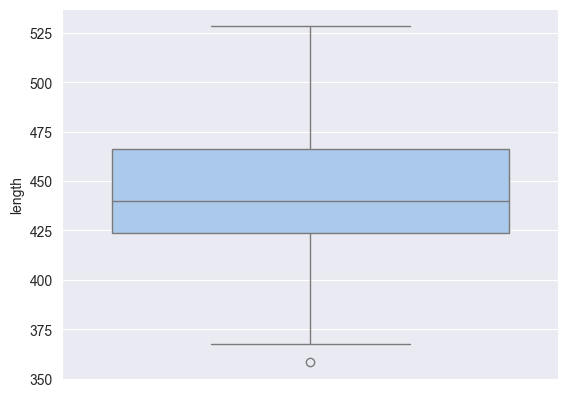

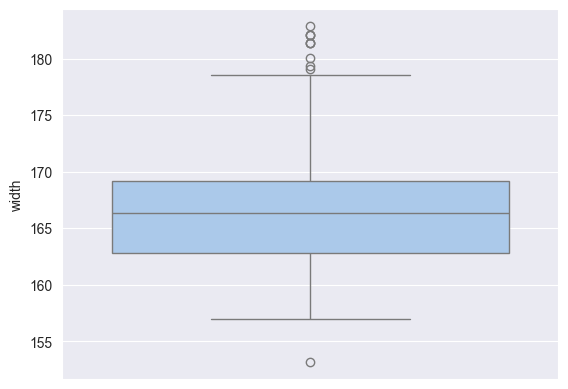

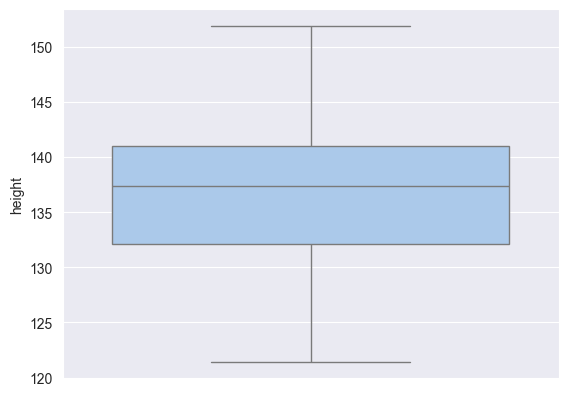

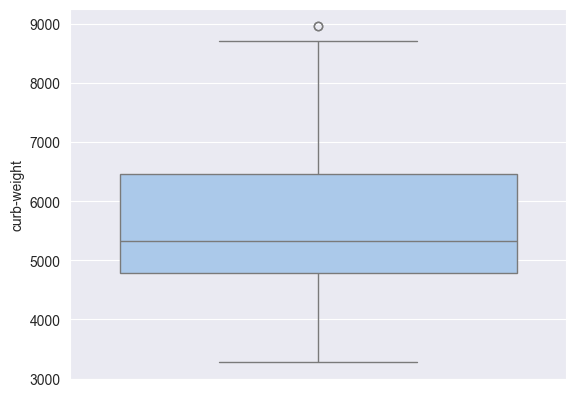

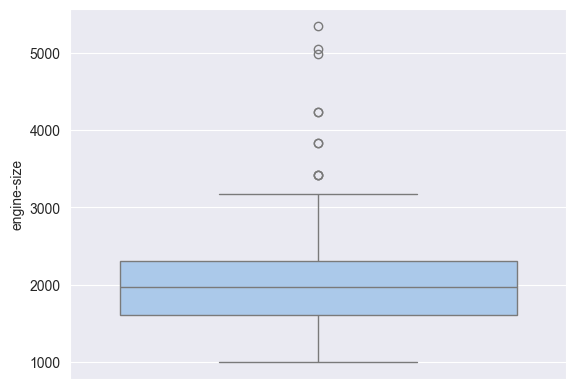

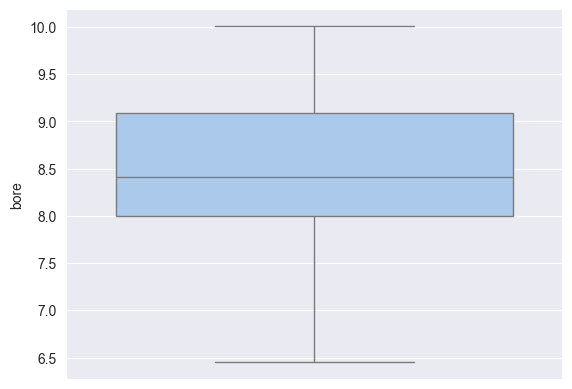

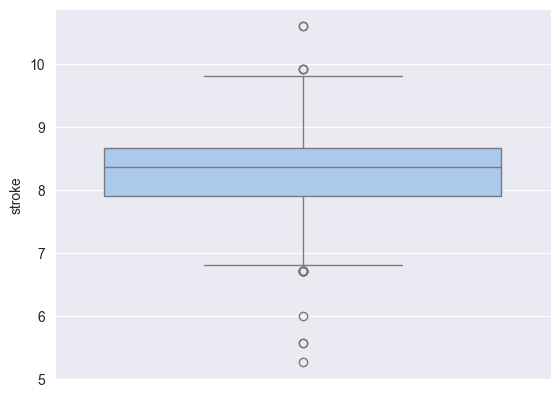

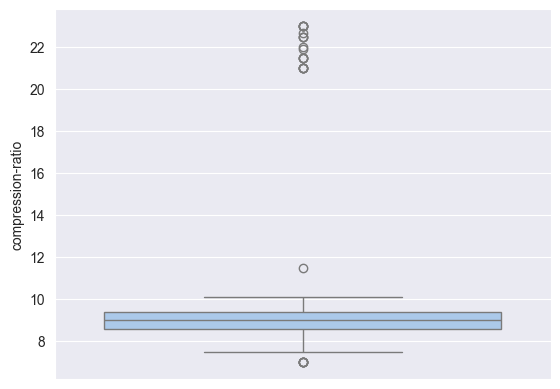

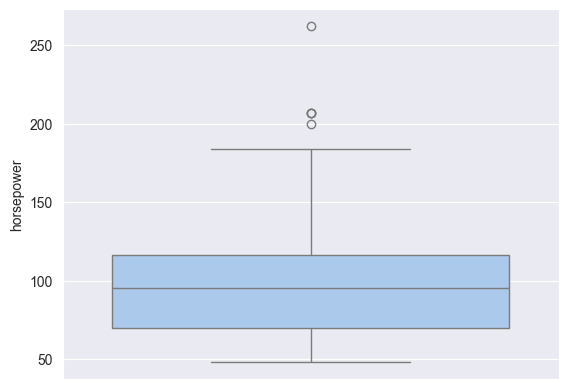

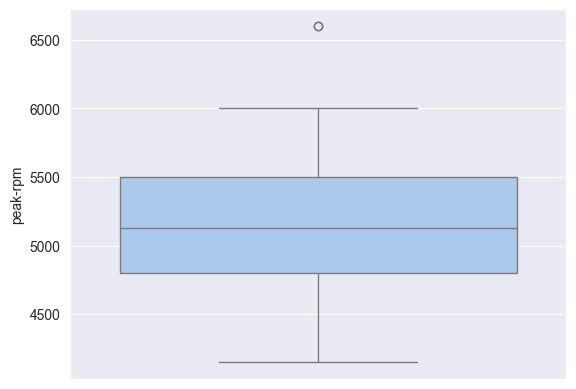

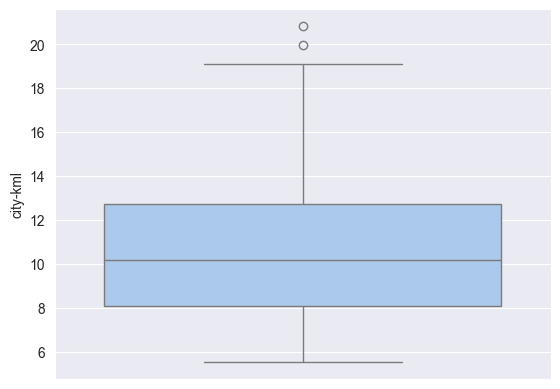

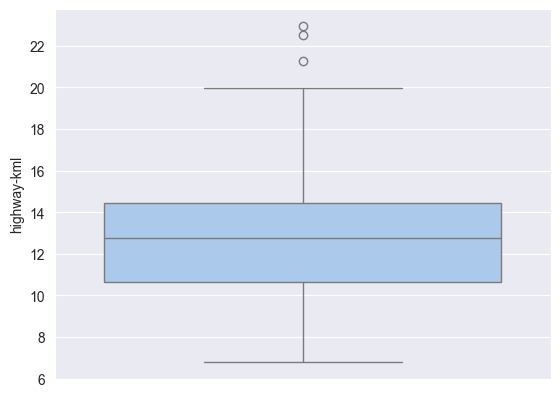

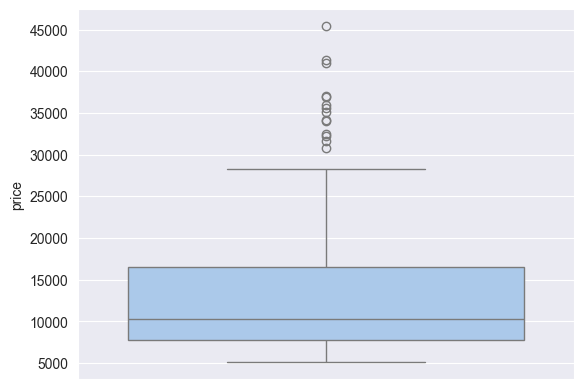

In [29]:
for col in df_numeric.columns:
    sns.boxplot(data = df, y = col)
    plt.show()

Per comprendere se i valori mostrati come outlier sono comunque sensati, si deve chiaramente avere una conoscenza delle variabili in gioco. Se questo non è il caso, si possono effettuare delle ricerche online:
- normalized-losses: questa variabile la conosce il creatore del dataset o l'assicuratore...per cui conviene lasciarla così;
- wheel-base: esistono delle vetture con poco più di 300 cm, per cui va bene;
- width: esistono vetture più larghe di 2 metri, per cui va bene. Tuttavia, 1.5 metri come larghezza minima sembra ridotta...potrebbe essere necessario verificare la vettura che riporta questa dimensione in modo numerico;
- curb-weight: il peso leggermente superiore al whisker del Q3 non sembra eccessivo;
- engine-size: alcune vetture hanno anche 10000 cm3 di cilindrata, per cui nessun problema;
- stroke: anche qui i valori potrebbero essere leciti, ma meglio verificare anche numericamente;
- compression-ratio: ci sono vetture con rapporti maggiori di 20, per cui tutto bene;
- peak-rpm: alcune vetture hanno anche 20000 rpm, per cui nessun problema;
- city-kml: anche se indicati come outlier, le vetture più efficienti sono in linea;
- highway-kml: anche se indicati come outlier, le vetture più efficienti sono in linea;
- price: i prezzi sembrano in linea con le vetture più costose.

Analizziamo numericamente width e stroke:
 

Partiamo con la larghezza. Prima di tutto, creiamo un dataframe con questa sola feature:

In [30]:
width = df['width']
width

0      162.814
1      162.814
2      166.370
3      168.148
4      168.656
        ...   
196    175.006
197    174.752
198    175.006
199    175.006
200    175.006
Name: width, Length: 201, dtype: float64

Ora calcoliamo $Q_1$ e $Q_3$ e, da questi, il valore di $IQR$:

In [31]:
q1 = width.quantile(0.25)
q3 = width.quantile(0.75)
iqr = q3 - q1

Imponiamo la condizione sui valori tramite $IQR$

In [32]:
iqr_outliers = width[((width < (q1 - 1.5*iqr)) | (width > (q3 + 1.5*iqr)))]
iqr_outliers

6     181.356
7     181.356
8     181.356
16    180.086
17    153.162
46    179.324
67    182.118
68    182.118
69    179.070
70    182.118
71    182.880
Name: width, dtype: float64

Stampiamo le osservazioni del dataset completo per questi outlier:

In [33]:
df.iloc[list(iqr_outliers.index), :]

symboling  normalized-losses           make fuel-type aspiration  \
6           1              158.0           audi       gas        std   
7           1              122.0           audi       gas        std   
8           1              158.0           audi       gas      turbo   
16          0              122.0            bmw       gas        std   
17          2              121.0      chevrolet       gas        std   
46          0              122.0         jaguar       gas        std   
67         -1               93.0  mercedes-benz    diesel      turbo   
68         -1              122.0  mercedes-benz       gas        std   
69          3              142.0  mercedes-benz       gas        std   
70          0              122.0  mercedes-benz       gas        std   
71          1              122.0  mercedes-benz       gas        std   

   num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
6          four        sedan          fwd           front     268.732  ...   
7          four        wagon          fwd           front     268.732  ...   
8          four        sedan          fwd           front     268.732  ...   
16         four        sedan          rwd           front     279.400  ...   
17          two    hatchback          fwd           front     224.536  ...   
46          two        sedan          rwd           front     259.080  ...   
67         four        sedan          rwd           front     293.624  ...   
68         four        sedan          rwd           front     293.624  ...   
69          two  convertible          rwd           front     245.364  ...   
70         four        sedan          rwd           front     307.086  ...   
71          two      hardtop          rwd           front     284.480  ...   

    engine-size  fuel-system    bore  stroke compression-ratio horsepower  \
6      2228.632         mpfi  8.1026  8.6360               8.5      110.0   
7      2228.632         mpfi  8.1026  8.6360               8.5      110.0   
8      2146.697         mpfi  7.9502  8.6360               8.3      140.0   
16     3424.883         mpfi  9.1948  8.6106               8.0      182.0   
17      999.607         2bbl  7.3914  7.6962               9.5       48.0   
46     5342.162         mpfi  8.9916  7.0104              11.5      262.0   
67     2998.821          idi  9.0932  9.2456              21.5      123.0   
68     3834.558         mpfi  8.7884  7.8740               8.3      155.0   
69     3834.558         mpfi  8.7884  7.8740               8.3      155.0   
70     5047.196         mpfi  9.6520  8.5090               8.0      184.0   
71     4981.648         mpfi  9.6520  8.5090               8.0      184.0   

    peak-rpm   city-kml  highway-kml    price  
6     5500.0   8.078231    10.629252  17710.0  
7     5500.0   8.078231    10.629252  18920.0  
8     5500.0   7.227891     8.503401  23875.0  
16    5400.0   6.377551     8.503401  36880.0  
17    5100.0  19.982993    22.534014   5151.0  
46    5000.0   5.527211     7.227891  36000.0  
67    4350.0   9.353741    10.629252  31600.0  
68    4750.0   6.802721     7.653061  34184.0  
69    4750.0   6.802721     7.653061  35056.0  
70    4500.0   5.952381     6.802721  40960.0  
71    4500.0   5.952381     6.802721  45400.0  

[11 rows x 26 columns]

Per le vetture indicate, una larghezza di 1.6-1.8 metri è lecita. Per quanto riguarda i valori minimi, potrebbero trarci in inganno...tuttavia, la Chevrolet Beat ha una larghezza di circa 1.595 metri, per cui potrebbero essere ancora dei valori leciti.

Passiamo allo stroke:

In [34]:
stroke = df['stroke']
stroke

0      6.8072
1      6.8072
2      8.8138
3      8.6360
4      8.6360
        ...  
196    8.0010
197    8.0010
198    7.2898
199    8.6360
200    8.0010
Name: stroke, Length: 201, dtype: float64

In [35]:
q1 = stroke.quantile(0.25)
q3 = stroke.quantile(0.75)
iqr = q3 - q1
iqr_outliers = stroke[((stroke < (q1 - 1.5*iqr)) | (stroke > (q3 + 1.5*iqr)))]
iqr_outliers

28      9.9060
44     10.5918
45     10.5918
108     5.5626
110     5.5626
126     9.9060
127     9.9060
130     5.2578
134     5.9944
135     6.7056
136     6.7056
137     6.7056
138     6.7056
139     6.7056
140     6.7056
141     6.7056
142     6.7056
143     6.7056
144     6.7056
145     6.7056
Name: stroke, dtype: float64

In [36]:
df.iloc[list(iqr_outliers.index), :]

symboling  normalized-losses     make fuel-type aspiration num-of-doors  \
28           3              145.0    dodge       gas      turbo          two   
44           0              145.0   jaguar       gas        std         four   
45           0              122.0   jaguar       gas        std         four   
108          0              161.0  peugeot       gas        std         four   
110          0              122.0  peugeot       gas        std         four   
126          0              122.0  renault       gas        std         four   
127          2              122.0  renault       gas        std          two   
130          3              150.0     saab       gas        std          two   
134          2               83.0   subaru       gas        std          two   
135          2               83.0   subaru       gas        std          two   
136          2               83.0   subaru       gas        std          two   
137          0              102.0   subaru       gas        std         four   
138          0              102.0   subaru       gas        std         four   
139          0              102.0   subaru       gas        std         four   
140          0              102.0   subaru       gas        std         four   
141          0              102.0   subaru       gas      turbo         four   
142          0               89.0   subaru       gas        std         four   
143          0               89.0   subaru       gas        std         four   
144          0               85.0   subaru       gas        std         four   
145          0               85.0   subaru       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
28   hatchback          fwd           front     243.586  ...     2556.372   
44       sedan          rwd           front     287.020  ...     4227.846   
45       sedan          rwd           front     287.020  ...     4227.846   
108      sedan          rwd           front     274.066  ...     1966.440   
110      wagon          rwd           front     290.068  ...     1966.440   
126      wagon          fwd           front     244.094  ...     2163.084   
127  hatchback          fwd           front     244.094  ...     2163.084   
130  hatchback          fwd           front     251.714  ...     1982.827   
134  hatchback          fwd           front     237.998  ...     1589.539   
135  hatchback          fwd           front     237.998  ...     1769.796   
136  hatchback          4wd           front     236.982  ...     1769.796   
137      sedan          fwd           front     246.888  ...     1769.796   
138      sedan          fwd           front     246.888  ...     1769.796   
139      sedan          fwd           front     246.888  ...     1769.796   
140      sedan          4wd           front     246.380  ...     1769.796   
141      sedan          4wd           front     246.380  ...     1769.796   
142      wagon          fwd           front     246.380  ...     1769.796   
143      wagon          fwd           front     246.380  ...     1769.796   
144      wagon          4wd           front     246.126  ...     1769.796   
145      wagon          4wd           front     246.126  ...     1769.796   

     fuel-system    bore   stroke compression-ratio  horsepower     peak-rpm  \
28           mfi  9.1440   9.9060               7.0  145.000000  5000.000000   
44          mpfi  9.2202  10.5918               8.1  176.000000  4750.000000   
45          mpfi  9.2202  10.5918               8.1  176.000000  4750.000000   
108         mpfi  8.7884   5.5626               8.4   95.000000  5000.000000   
110         mpfi  8.7884   5.5626               8.4   95.000000  5000.000000   
126         mpfi  8.7884   9.9060               8.7  104.256158  5125.369458   
127         mpfi  8.7884   9.9060               8.7  104.256158  5125.369458   
130         mpfi  6.4516   5.2578               9.3  110.000000  5

Con una ricerca in rete, esistono dei modelli di queste vetture per cui i valori dello stroke sono in linea.

Terminata la pulizia dei dati, possiamo iniziare la loro esplorazione.

# 3 Esplorazione delle feature

## 3.1 Punto centrale e spread delle feature

Per calcolare i punti centrali di ogni feature, si ricorre subito al metodo describe(). Per la moda, dovremo procedere a parte. 

In [37]:
df.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  201.000000          201.00000  201.000000  201.000000  201.000000   
mean     0.840796          122.00000  250.944418  442.470527  167.358199   
std      1.254802           31.99625   15.408569   31.298325    5.337736   
min     -2.000000           65.00000  219.964000  358.394000  153.162000   
25%      0.000000          101.00000  240.030000  423.672000  162.814000   
50%      1.000000          122.00000  246.380000  439.928000  166.370000   
75%      2.000000          137.00000  260.096000  466.090000  169.164000   
max      3.000000          256.00000  307.086000  528.574000  182.880000   

           height  curb-weight  engine-size        bore      stroke  \
count  201.000000   201.000000   201.000000  201.000000  201.000000   
mean   136.567333  5635.245000  2079.110816    8.459957    8.272460   
std      6.217468  1140.639282   680.827976    0.680903    0.802761   
min    121.412000  3281.040000   999.607000    6.451600    5.257800   
25%    132.080000  4782.645000  1605.926000    8.001000    7.899400   
50%    137.414000  5322.870000  1966.440000    8.407400    8.356600   
75%    140.970000  6451.830000  2310.567000    9.093200    8.661400   
max    151.892000  8965.530000  5342.162000   10.007600   10.591800   

       compression-ratio  horsepower     peak-rpm    city-kml  highway-kml  \
count         201.000000  201.000000   201.000000  201.000000   201.000000   
mean           10.164279  103.405534  5117.665368   10.705402    13.047010   
std             4.004965   37.365700   478.113805    2.730961     2.897598   
min             7.000000   48.000000  4150.000000    5.527211     6.802721   
25%             8.600000   70.000000  4800.000000    8.078231    10.629252   
50%             9.000000   95.000000  5125.369458   10.204082    12.755102   
75%             9.400000  116.000000  5500.000000   12.755102    14.455782   
max            23.000000  262.000000  6600.000000   20.833333    22.959184   

              price  
count    201.000000  
mean   13207.129353  
std     7947.066342  
min     5118.000000  
25%     7775.000000  
50%    10295.000000  
75%    16500.000000  
max    45400.000000

In [38]:
df.describe(include='object')

make fuel-type aspiration num-of-doors body-style drive-wheels  \
count      201       201        201          201        201          201   
unique      22         2          2            2          5            3   
top     toyota       gas        std         four      sedan          fwd   
freq        32       181        165          115         94          118   

       engine-location engine-type num-of-cylinders fuel-system  
count              201         201              201         201  
unique               2           6                7           8  
top              front         ohc             four        mpfi  
freq               198         145              157          92

La moda delle feature categoriche viene già fornita. Per quella delle variabili numeriche, possiamo sfruttare value_counts()

In [39]:
df['symboling'].value_counts().idxmax()

0

In [40]:
df['normalized-losses'].value_counts().idxmax()

122.0

In [41]:
df['wheel-base'].value_counts().idxmax()

237.99800000000002

In [42]:
df['length'].value_counts().idxmax()

399.54200000000003

In [43]:
df['width'].value_counts().idxmax()

162.052

In [44]:
df['height'].value_counts().idxmax()

129.03199999999998

In [45]:
df['curb-weight'].value_counts().idxmax()

5258.925

In [46]:
df['engine-size'].value_counts().idxmax()

1999.214

In [47]:
df['bore'].value_counts().idxmax()

9.1948

In [48]:
df['stroke'].value_counts().idxmax()

8.636

In [49]:
df['compression-ratio'].value_counts().idxmax()

9.0

In [50]:
df['horsepower'].value_counts().idxmax()

68.0

In [51]:
df['city-kml'].value_counts().idxmax()

13.180272108843537

In [52]:
df['highway-kml'].value_counts().idxmax()

10.629251700680273

In [193]:
df['price'].value_counts().idxmax()

8921.0

In generale, quando la media e la mediana sono molto distanti si ha una distribuzione asimmetrica: la media rappresenta il valore medio, mentre la mediana indica il punto in cui il 50% dei dati si trova a destra e il 50% a sinistra. Questo avviene per alcune feature e possiamo apprezzarlo con il grafico della loro distribuzione di probabilità, quindi con un approccio visivo.

## 3.2 Visualizzazione delle distribuzioni

Per ogni feature numerica, possiamo creare una figura con due subplot:
- in quello di sinistra, inseriamo la distribuzione di probabilità;
- in quello di destra, mostriamo il boxplot (lo abbbiamo già inserito, ma conviene affiancarli per valutare appieno la distribuzione delle feature).

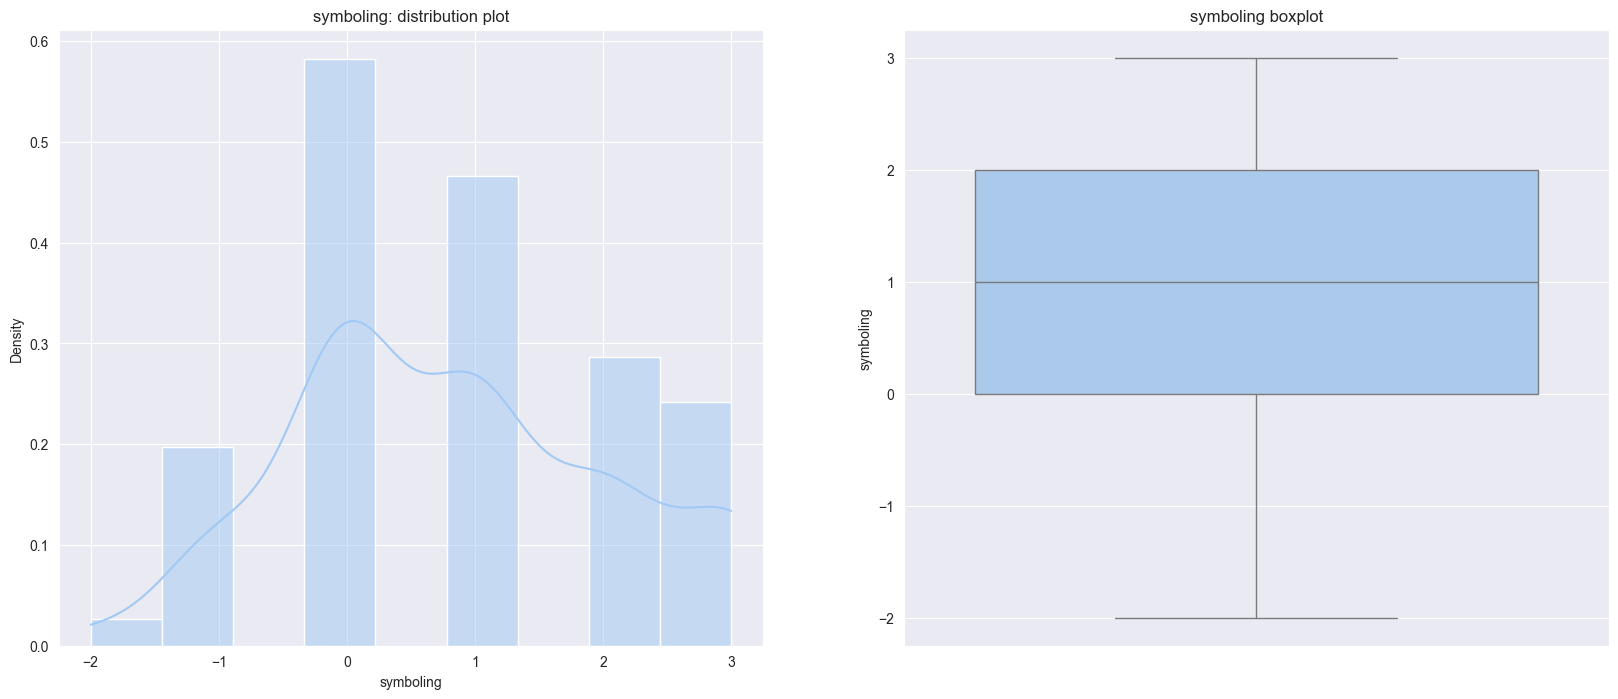

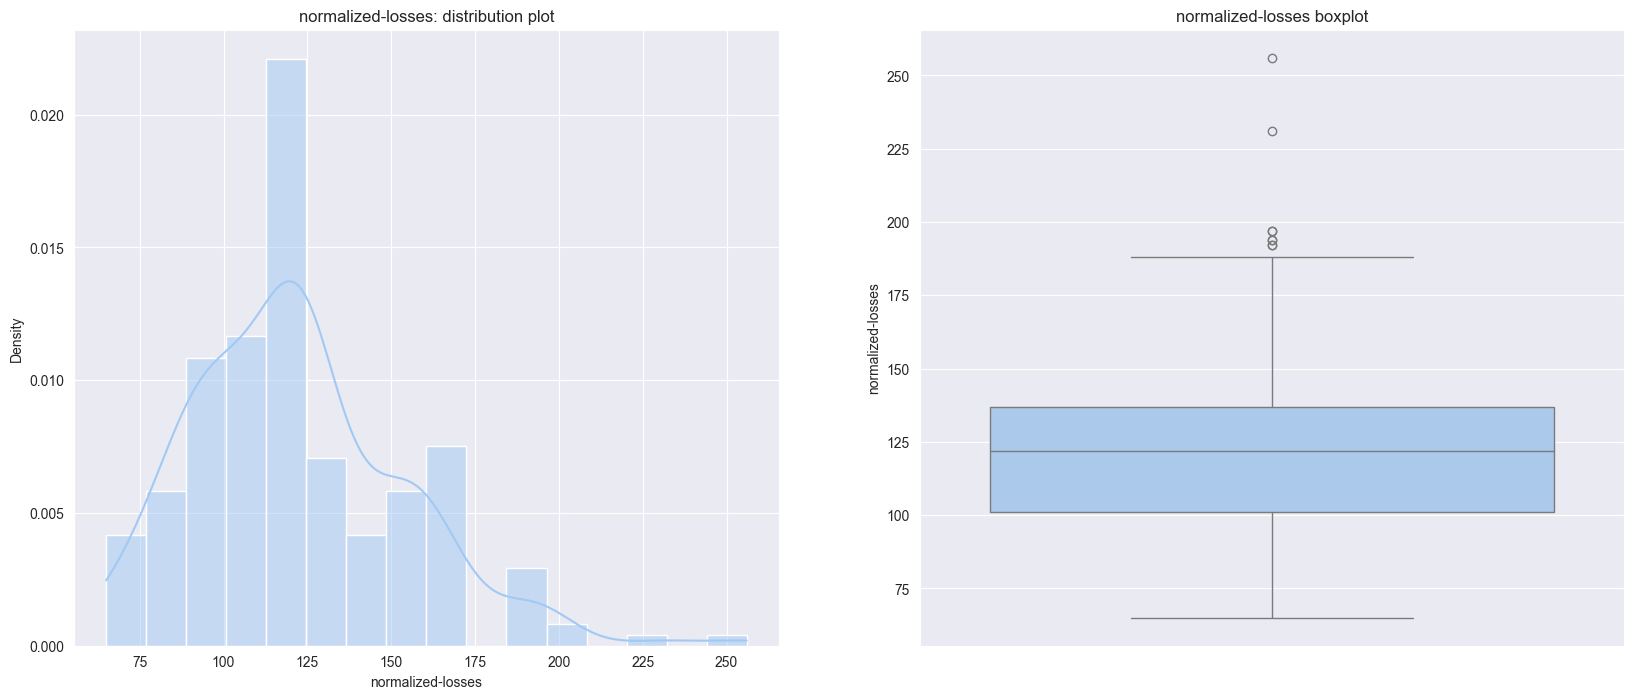

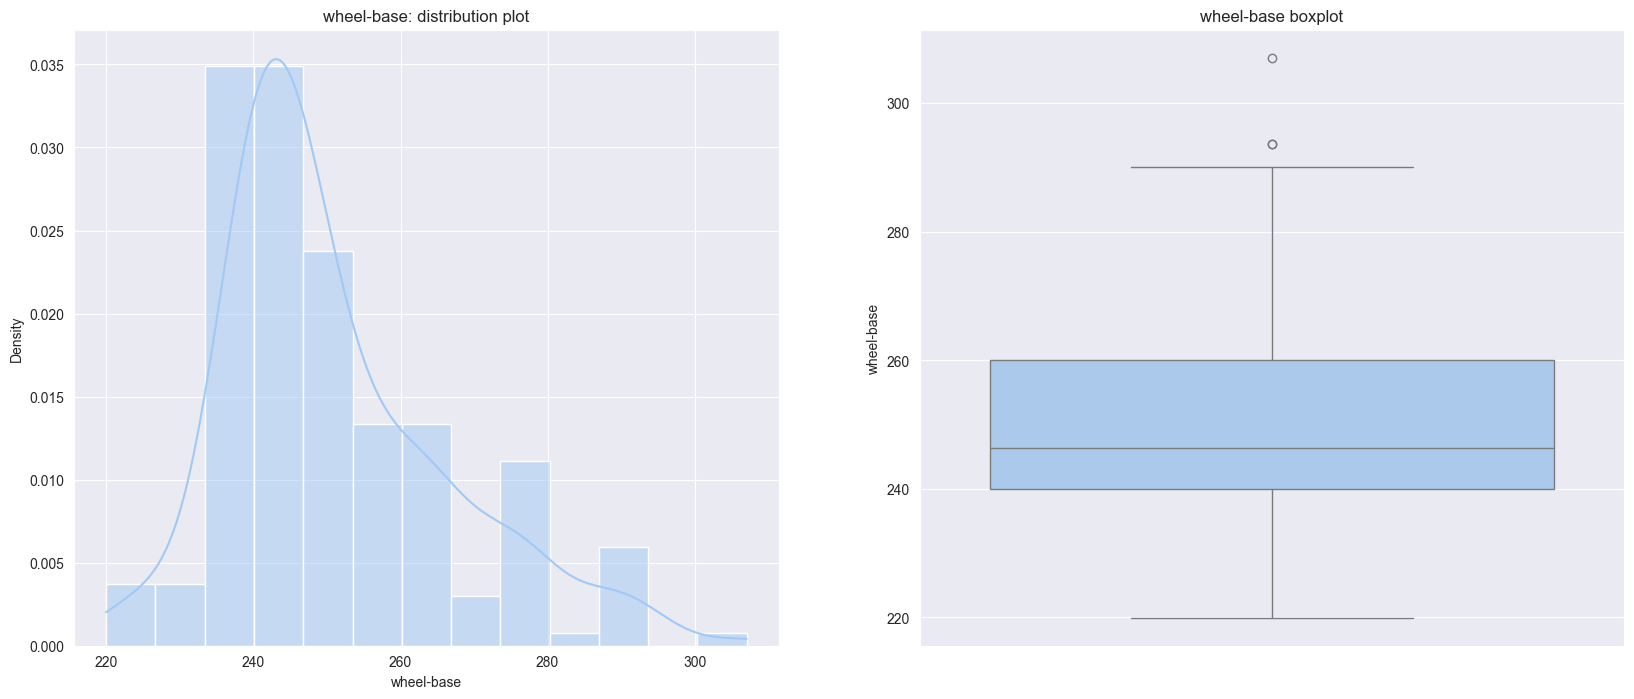

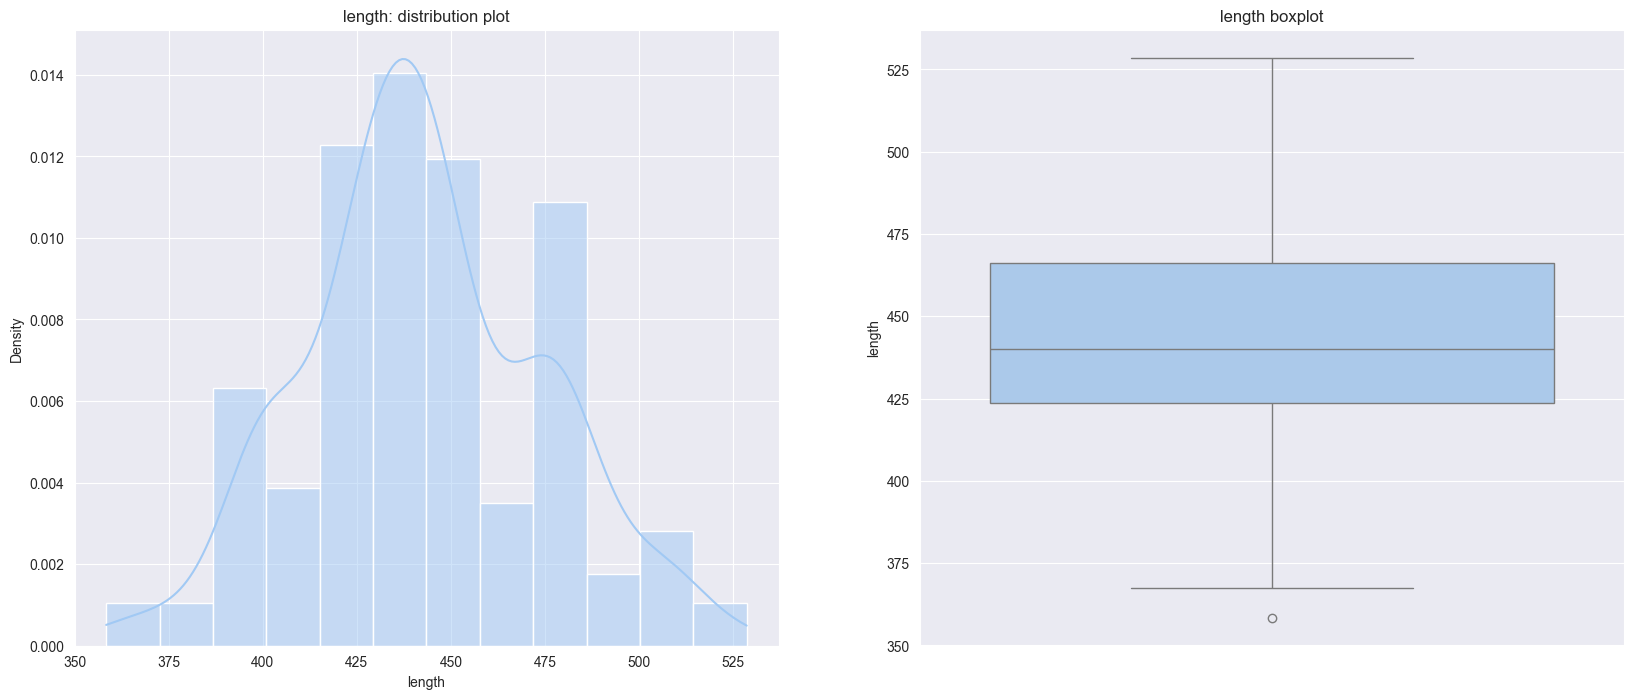

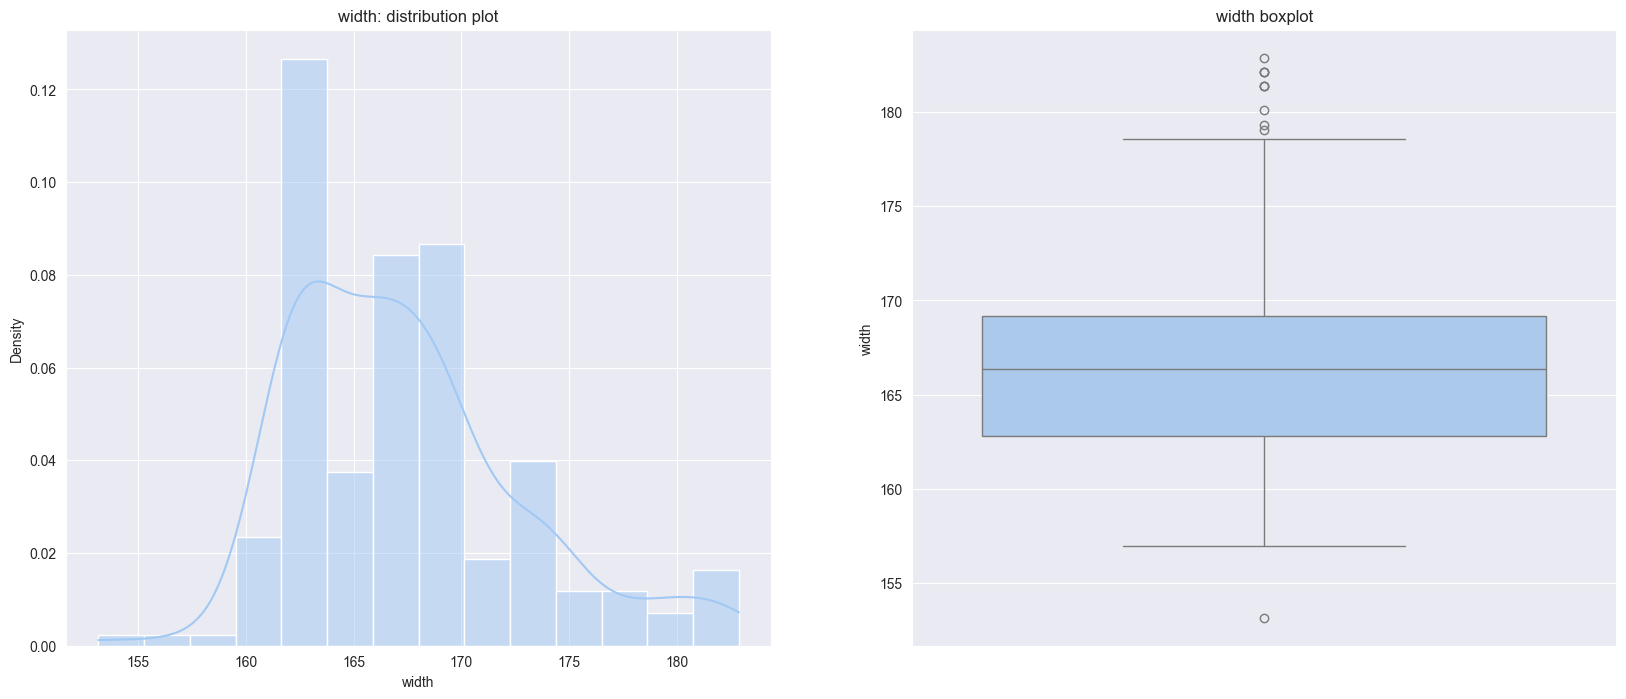

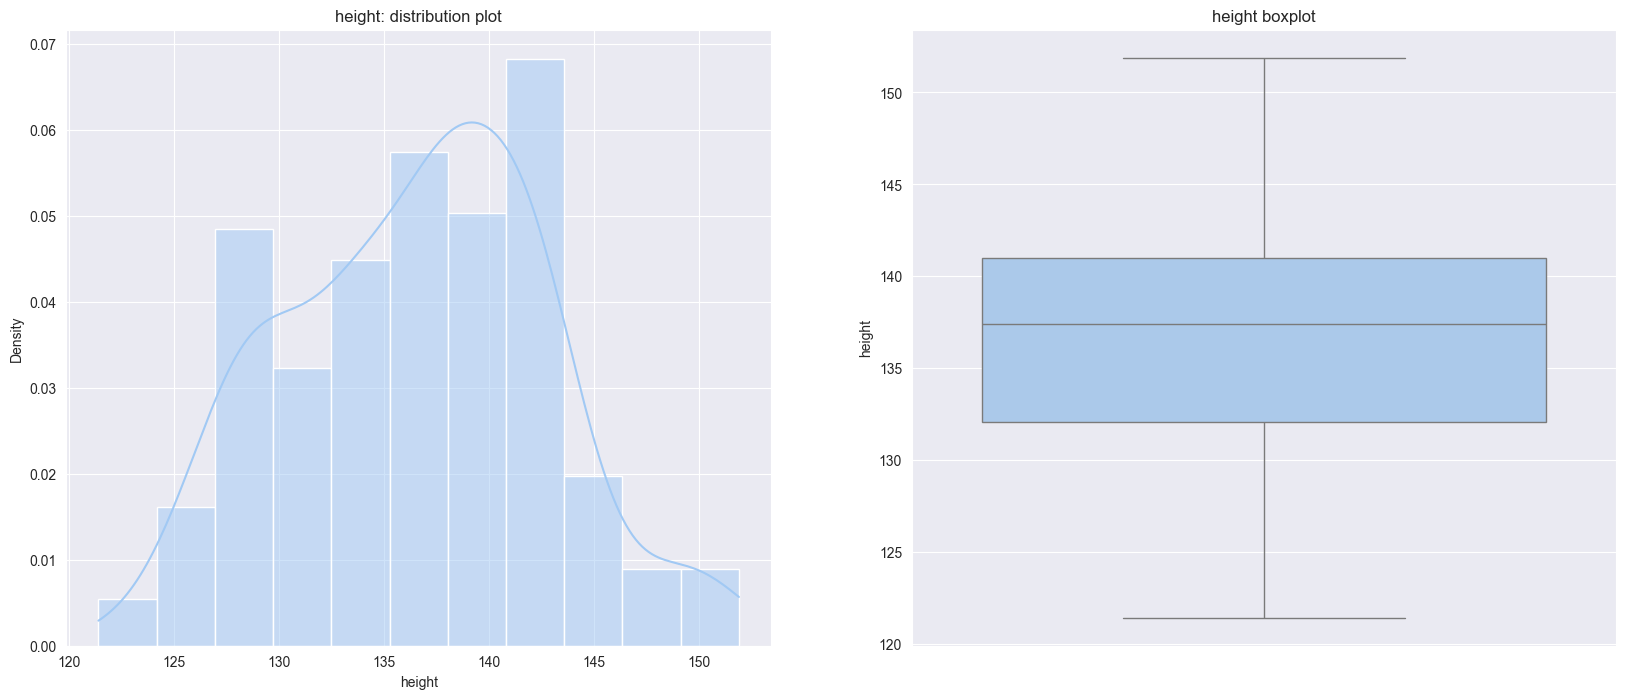

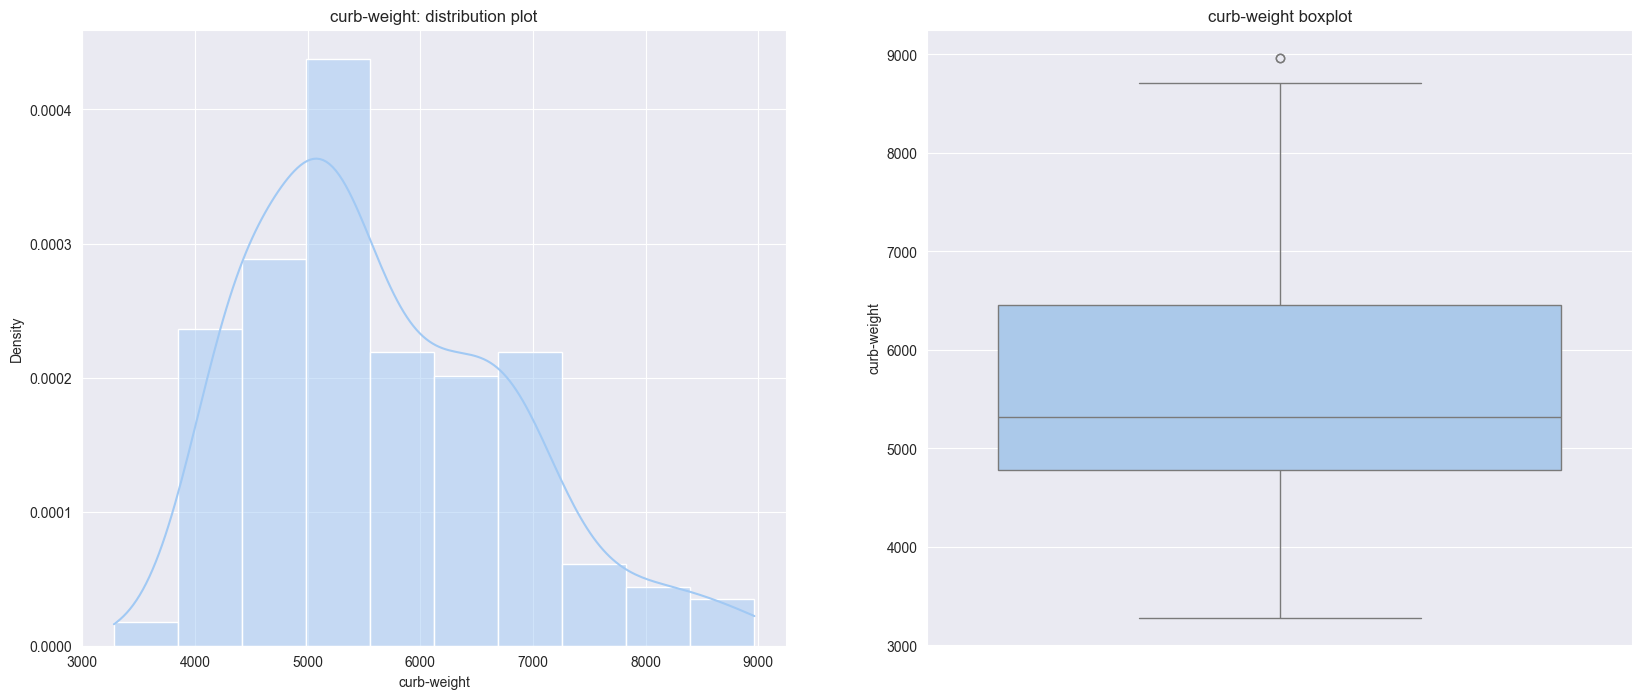

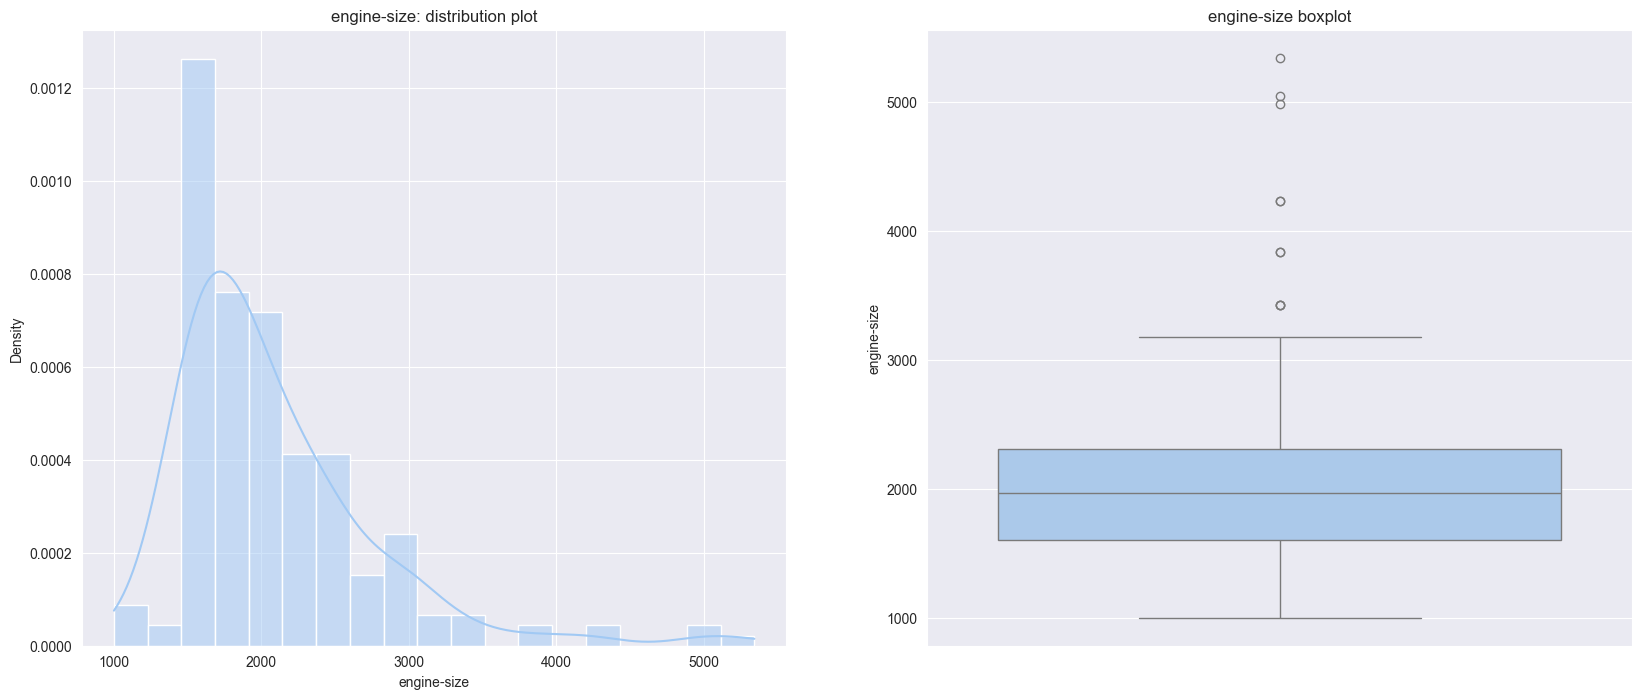

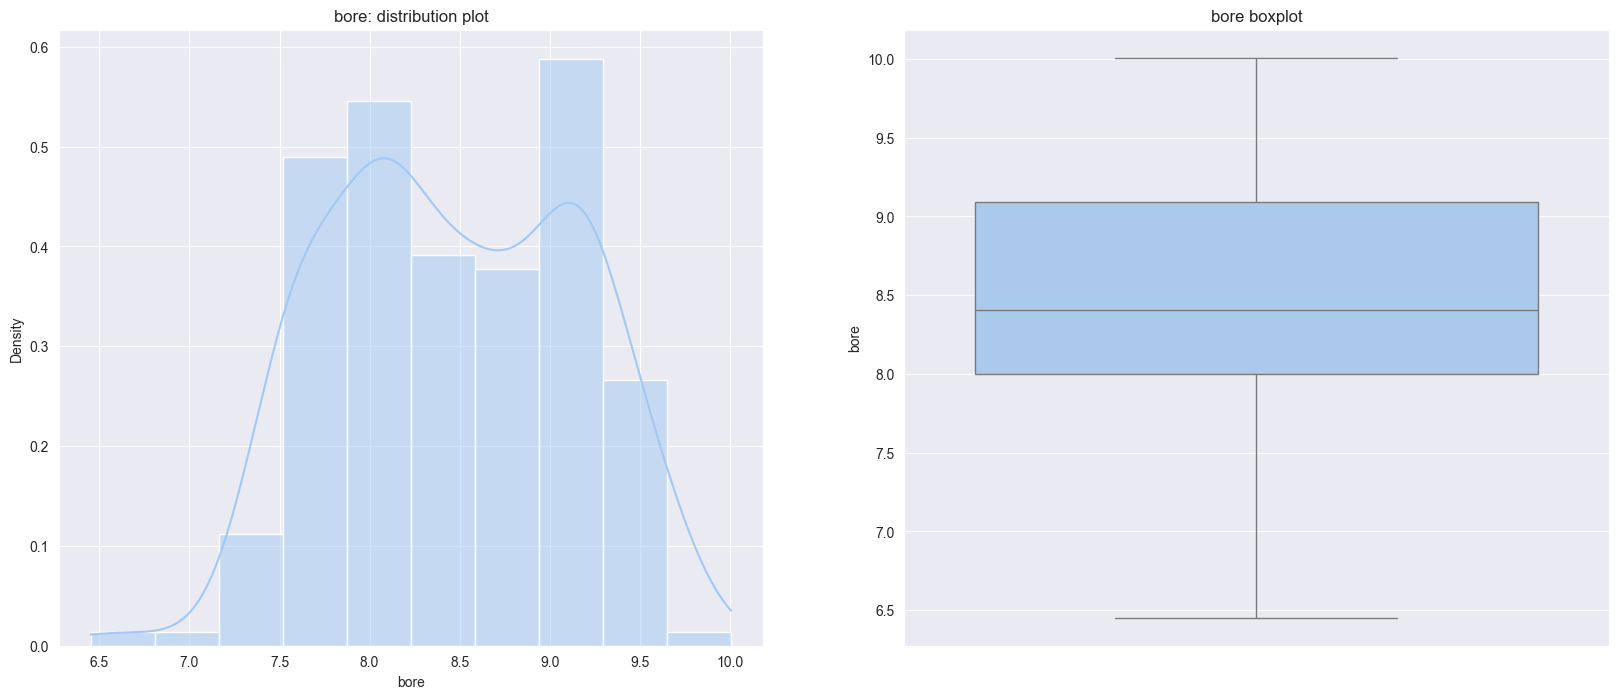

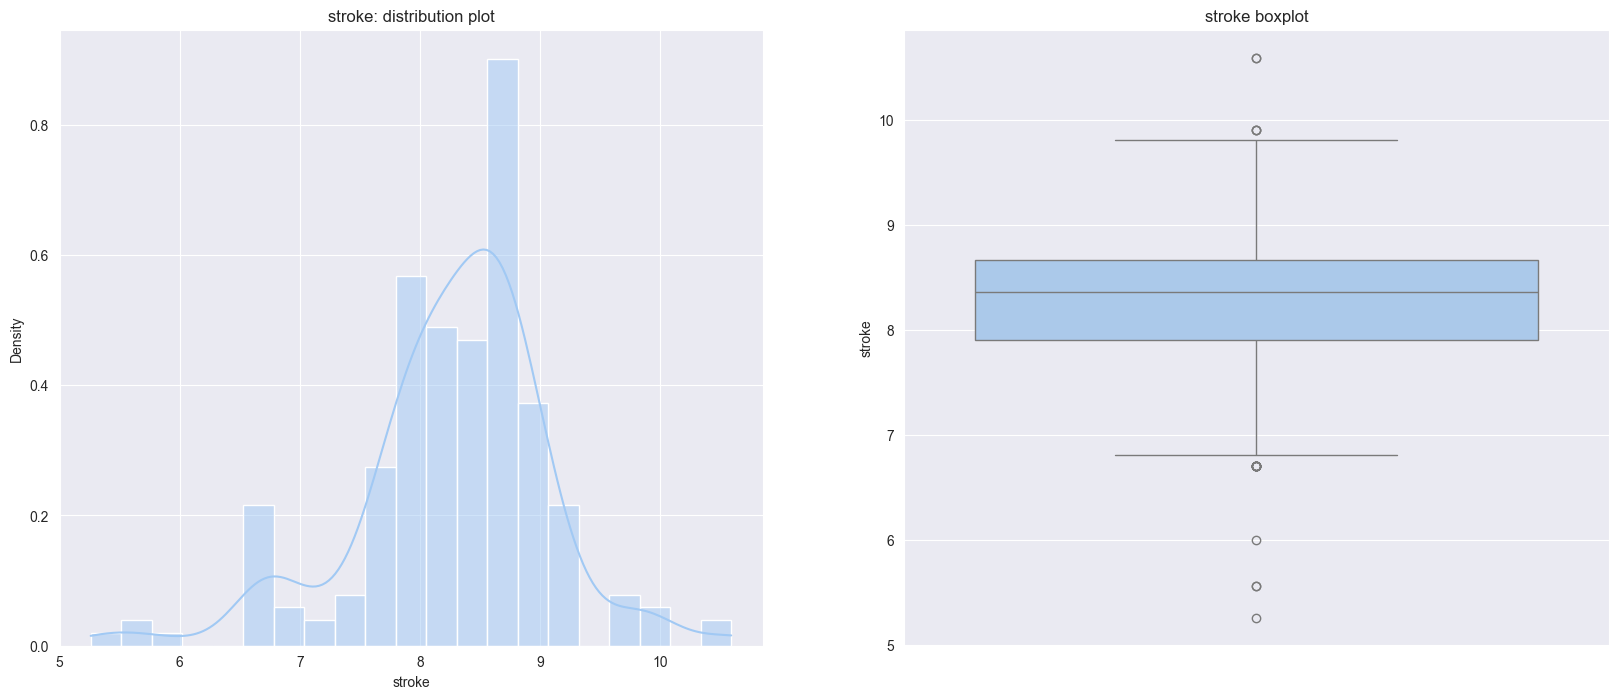

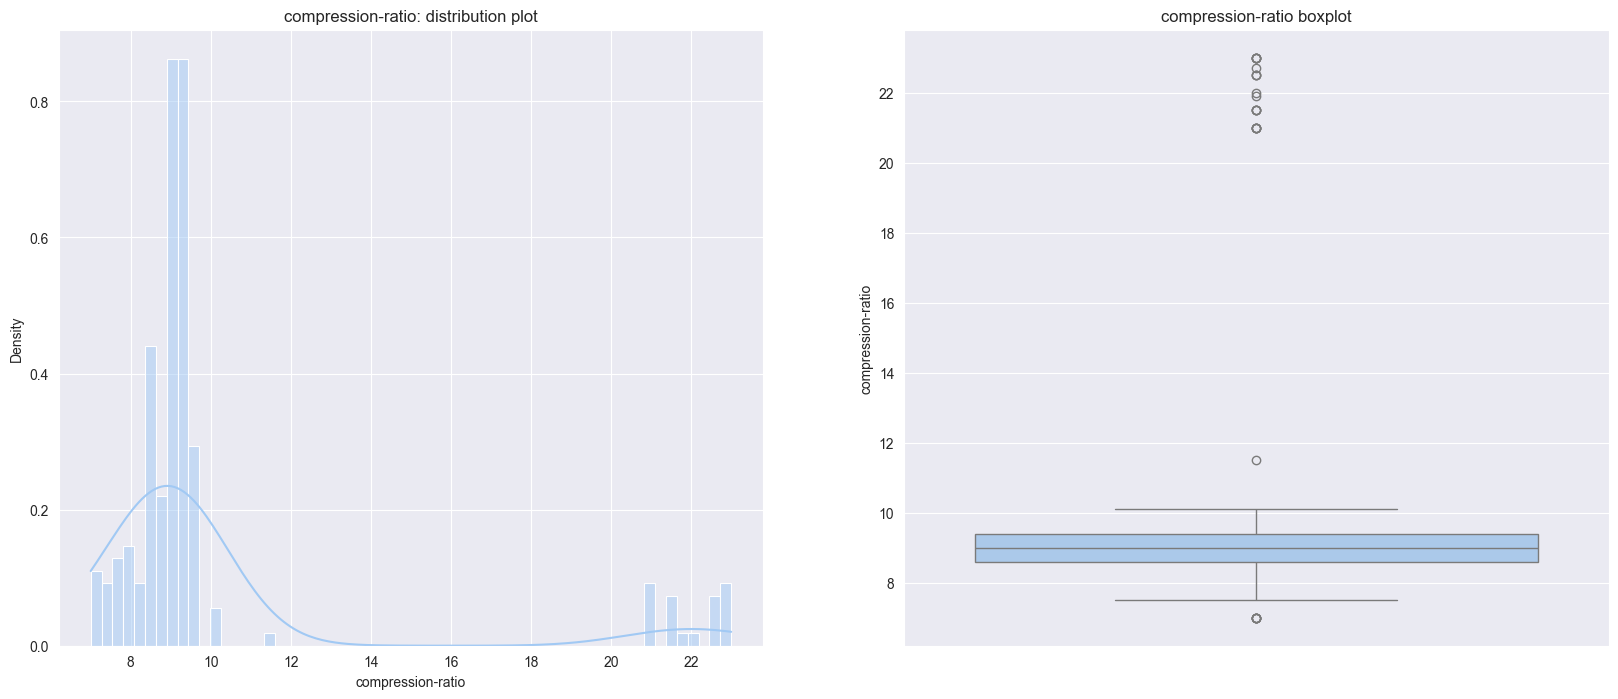

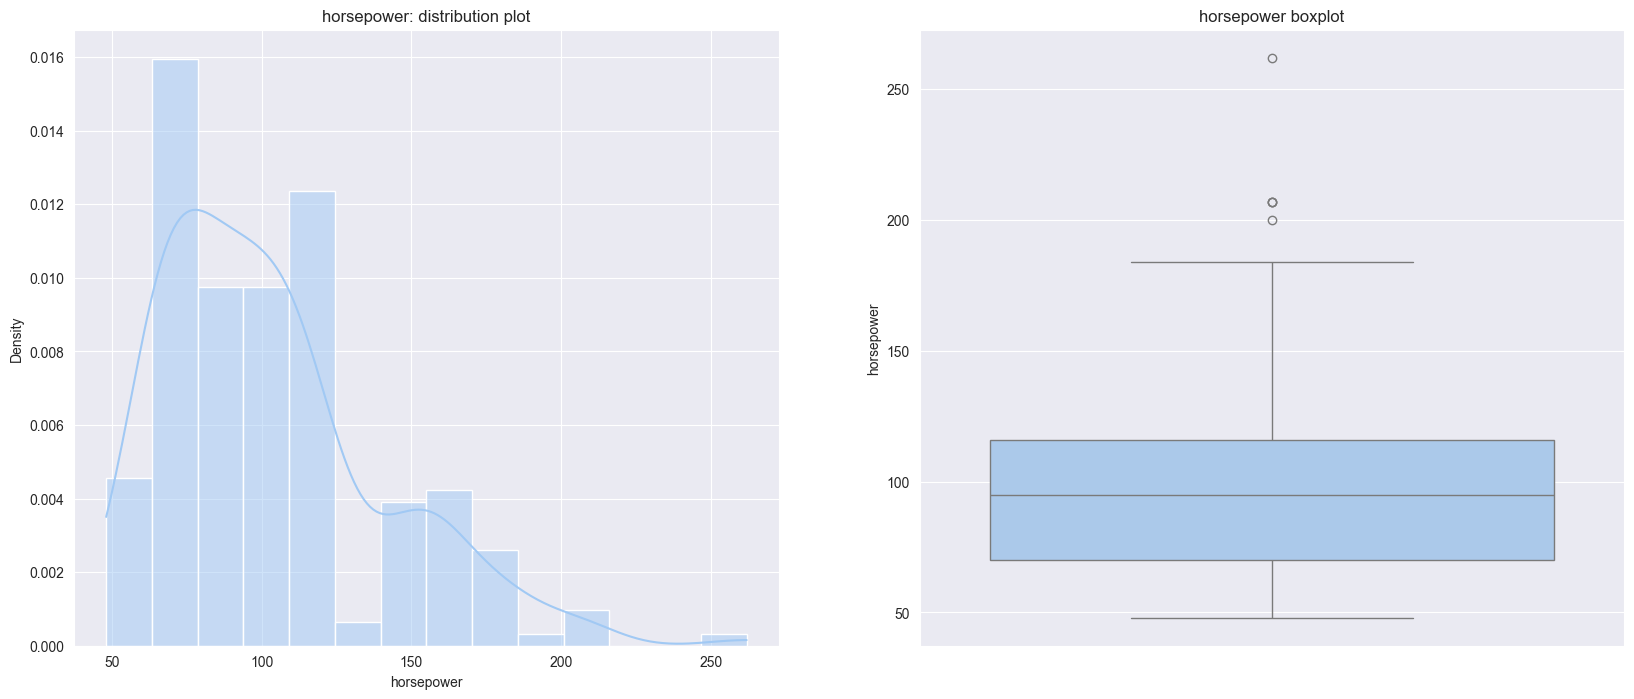

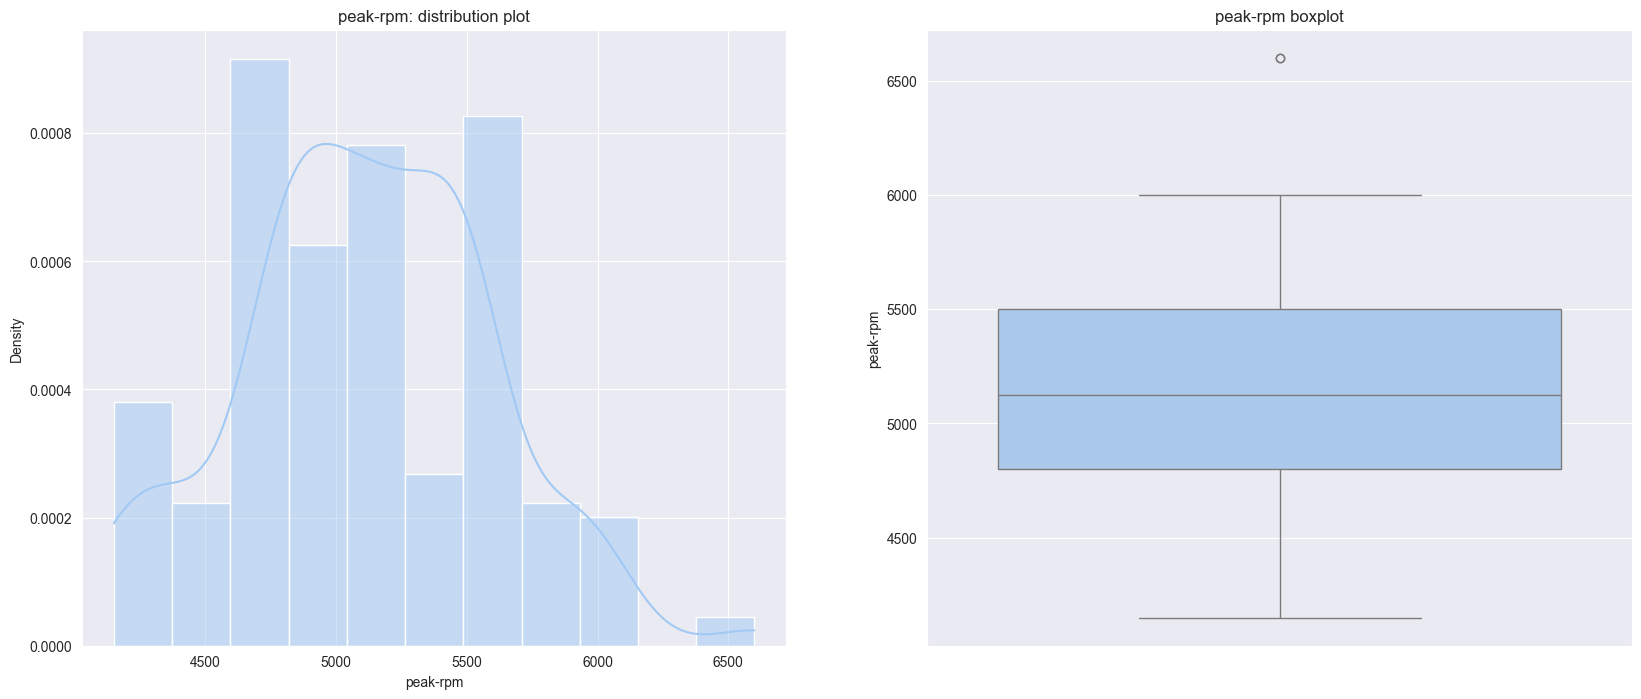

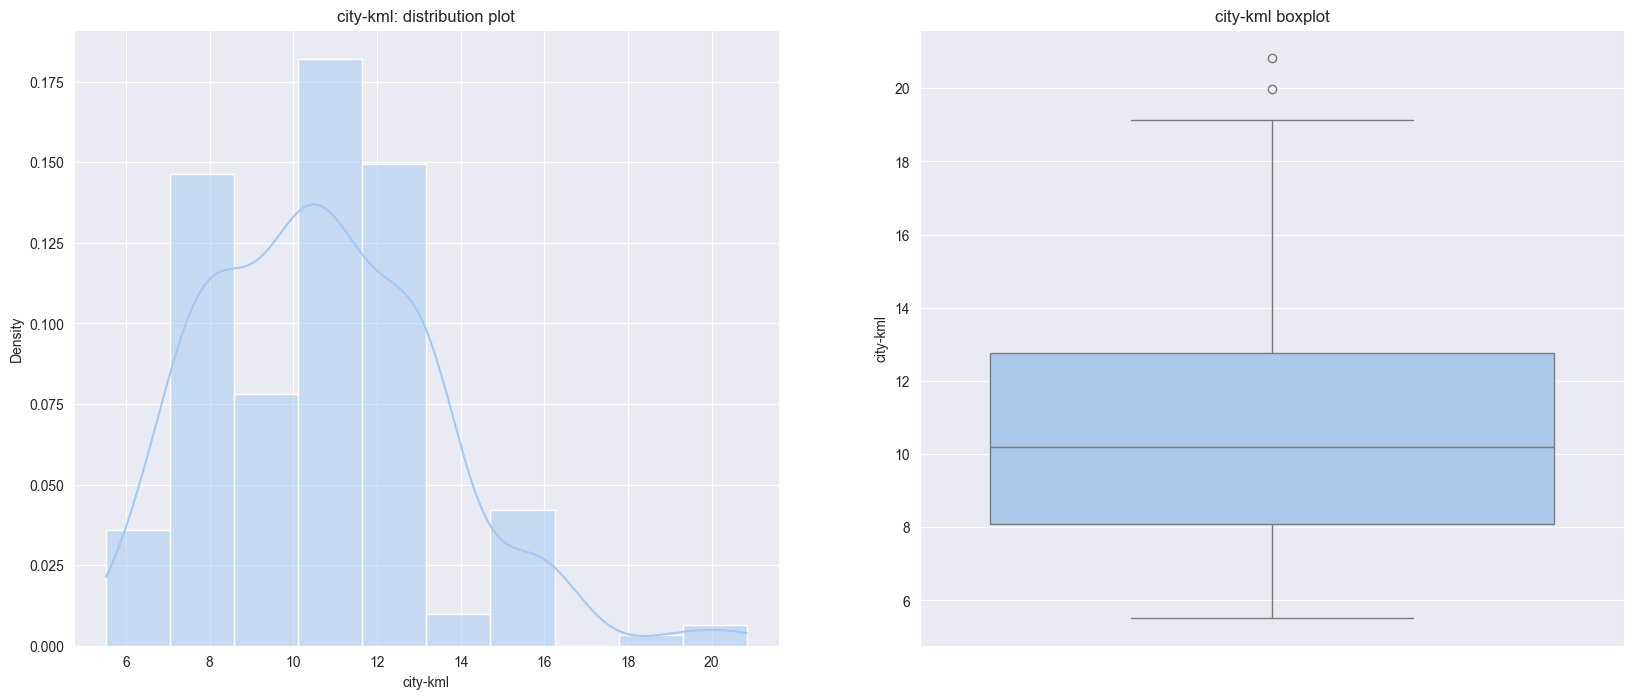

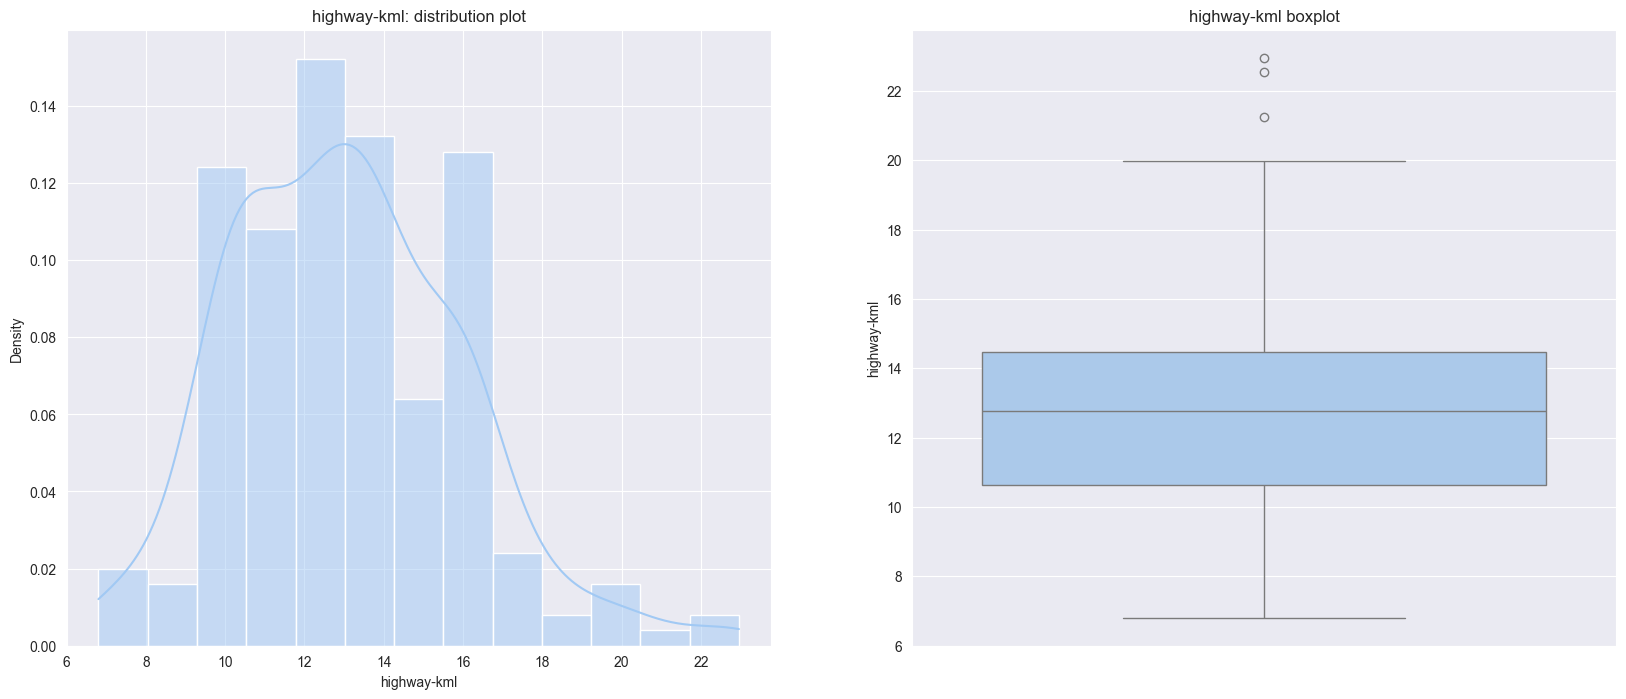

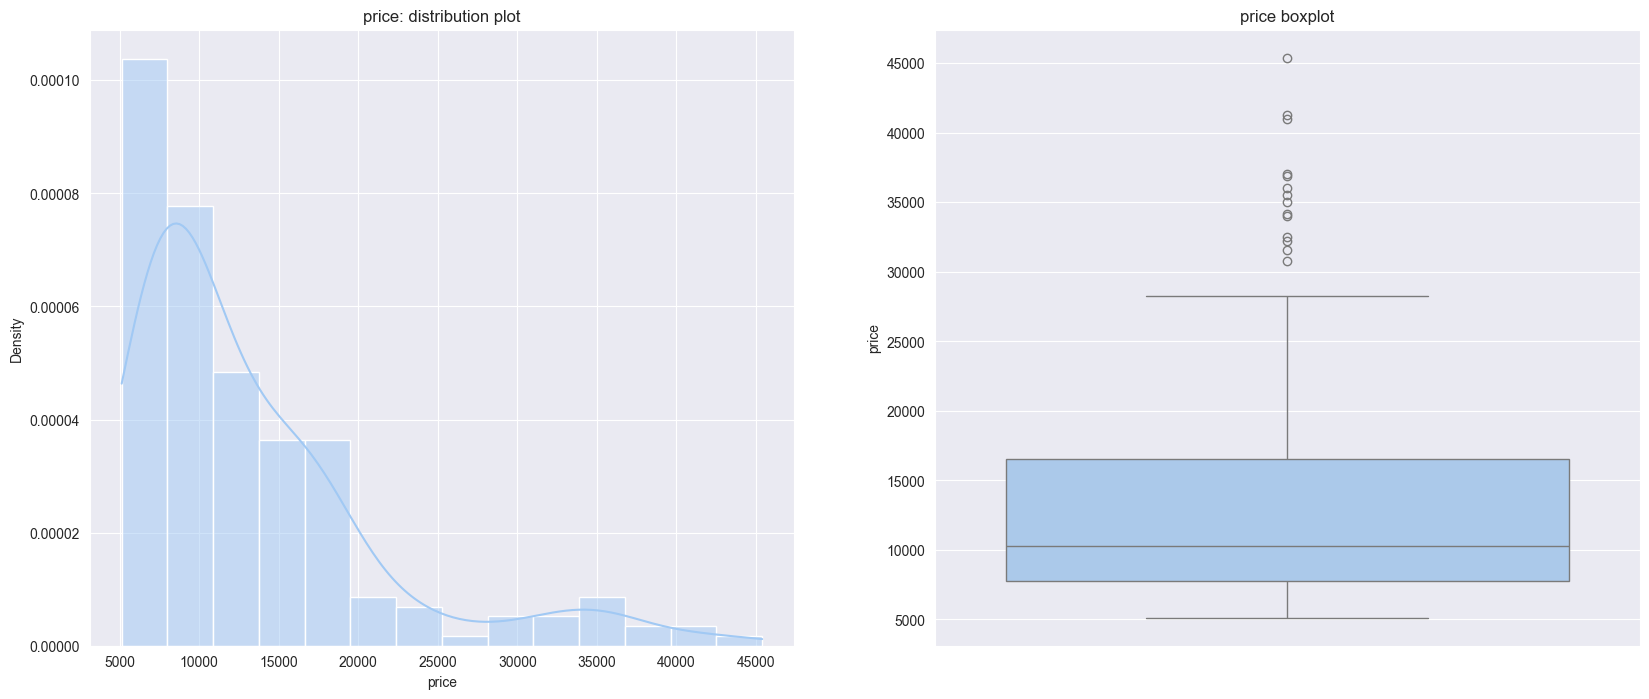

In [54]:
df_numeric = df[['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-kml', 'highway-kml', 'price']]
columns = df_numeric.columns

for col in columns:
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    plt.title(f'{col}: distribution plot')
    sns.histplot(df_numeric[col], kde=True, stat='density')
    
    plt.subplot(1,2,2)
    plt.title(f'{col} boxplot')
    sns.boxplot(y=df[col])
    
    plt.show()

Se si volesse valutare anche numericamente qualche punto della distribuzione, si può ricorrere ancora al metodo describe() indicando esplicitamente i percentili di interesse:

In [55]:
df['price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
85%      18420.000000
90%      22470.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

In base ai grafici e ai valori, possiamo osservare che:
- la distribuzione è fortemente asimmetrica verso sinistra, ovvero i dati più frequenti sono bassi (sotto i 15'000 in particolare). Questo è ulteriormente confermato nel boxplot e dalla differenza tra media e mediana osservabile nell'output del metodo describe();
- c'è uno spread significativo dei dati: l'85% delle osservazioni ha valori fino a 18'420, con il restante 15% che arriva fino a 45'400.

Visualizziamo ora alcune le feature categoriche, dove a sinistra andiamo a mostrare un bar plot delle occorrenze. Per il box plot, è interessante valutare se le feature sono dei possibili valori per discriminare il prezzo (che potrebbe essere la DV di un progetto di ML). Andiamo quindi a chiedere il box plot del prezzo, ma classificato in base alla variabile categorica. Le feature categoriche sono:
- make
- fuel-type
- aspiration
- num-of-doors
- body-style
- drive-wheels
- engine-location
- engine-type
- num-of-cylinders
- fuel-system


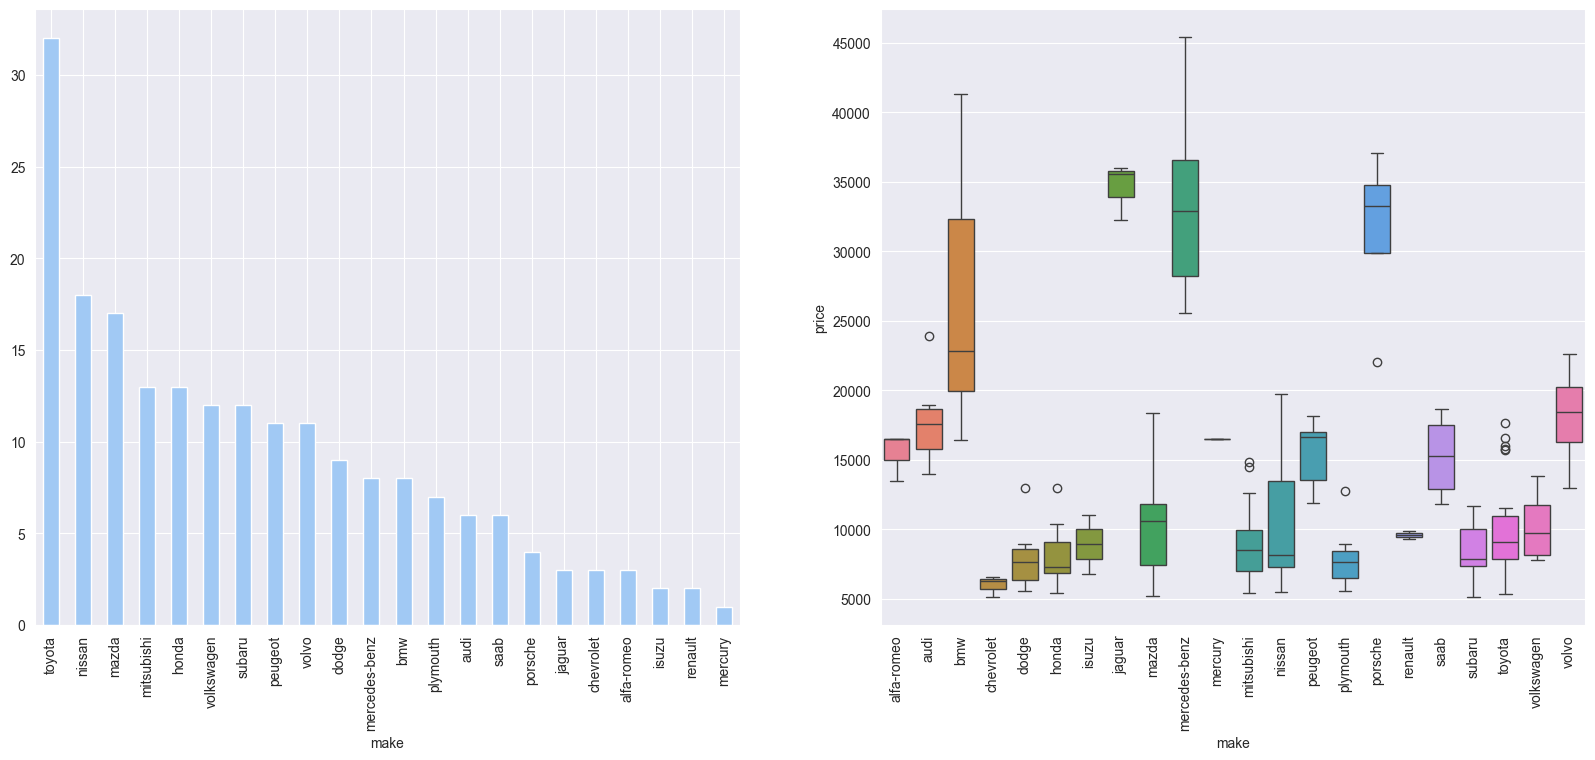

In [56]:
col = 'make'
plt.figure(figsize=(20,8))
    
plt.subplot(1,2,1)
df[col].value_counts().plot(kind='bar')
    
plt.subplot(1,2,2)
ax = sns.boxplot(data=df, x=col, y='price', hue=col)
ax.tick_params(axis='x', labelrotation=90)
    
plt.show()

Possiamo osservare che:
- la Toyota è il costruttore nettamente più presente nel dataset, seguito da Nissan e Mazda;
- alcuni dei boxplot classificati per costruttore sono effettivamente distinti, ma molti sono sovrapposti come range, il che potrebbe indicare che *make* potrebbe non essere ideale come predittore, ma non da scartare con leggerezza.

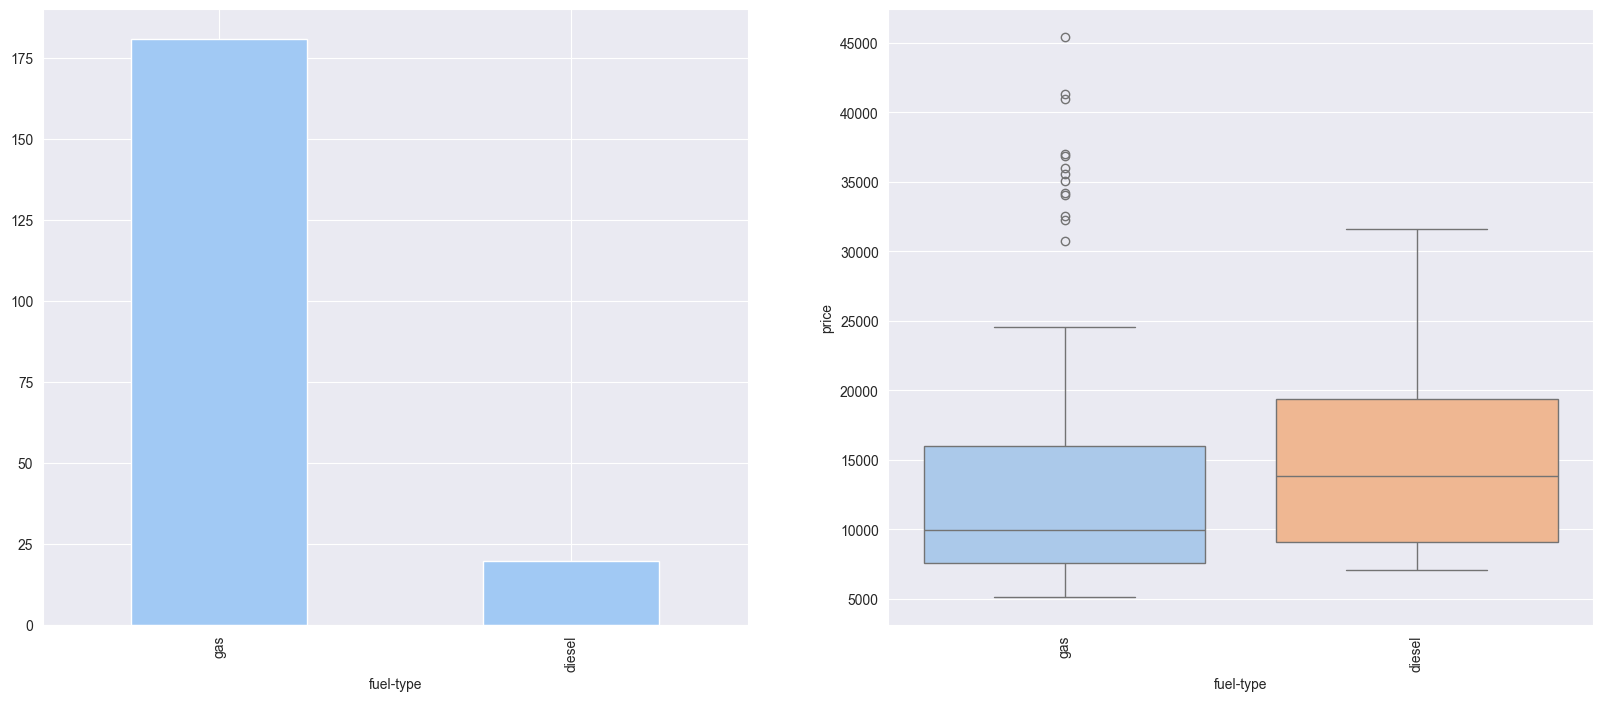

In [57]:
col = 'fuel-type'
plt.figure(figsize=(20,8))
    
plt.subplot(1,2,1)
df[col].value_counts().plot(kind='bar')
    
plt.subplot(1,2,2)
ax = sns.boxplot(data=df, x=col, y='price', hue=col)
ax.tick_params(axis='x', labelrotation=90)
    
plt.show()

Possiamo osservare che il numero di macchine a benzina è nettamente superiore a quelle a diesel (potrebbe indicare che dovremmo cercare altre informazioni per macchine diesel per migliorare il bilanciamento del dataset) e non sembrerebbe una feature su cui fare affidamento per la predizione. Il range di prezzo è tutto sommato simile, ma quelle a benzina presentano degli outlier ad alto prezzo: potrebbe trattarsi di vetture più costose e dai consumi maggiori, che tipicamente sono a benzina appunto.

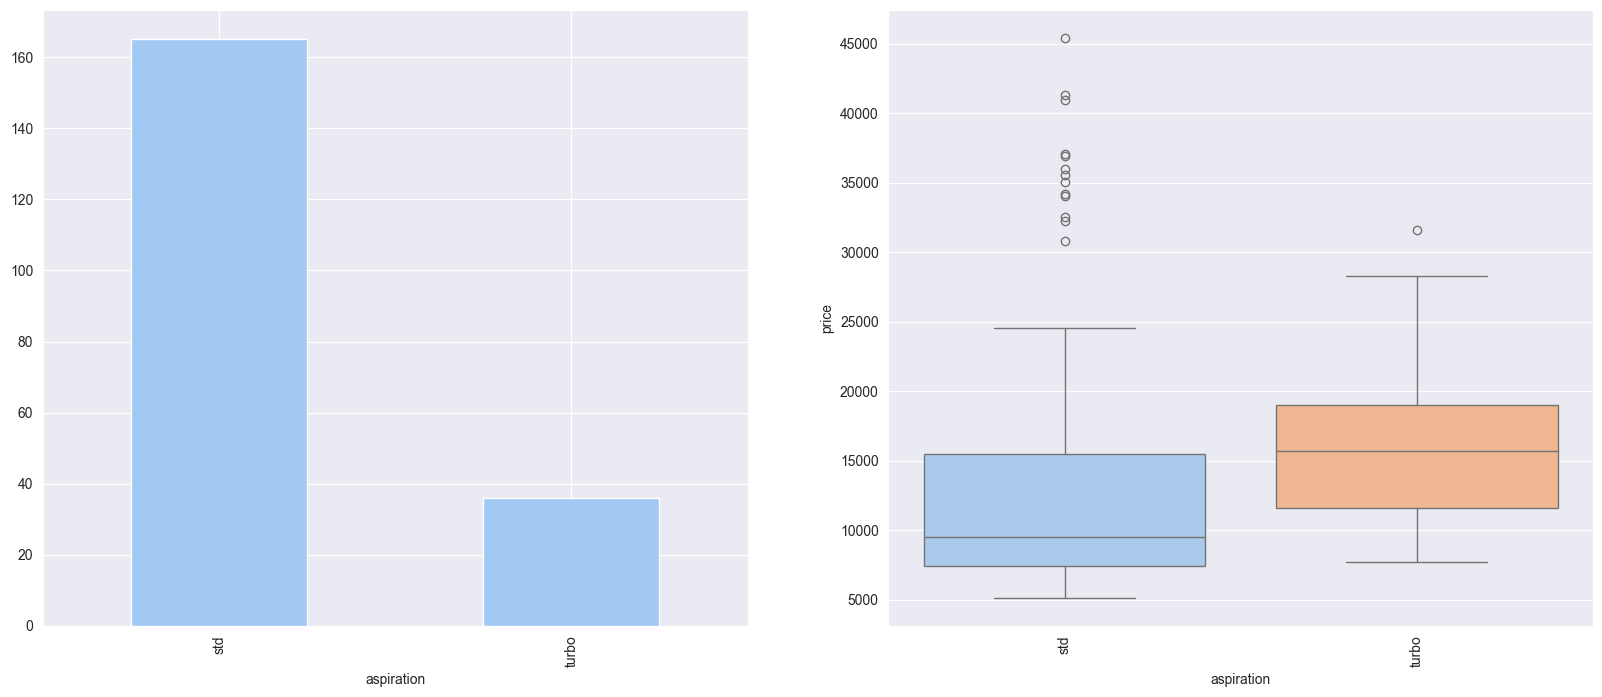

In [58]:
col = 'aspiration'
plt.figure(figsize=(20,8))
    
plt.subplot(1,2,1)
df[col].value_counts().plot(kind='bar')
    
plt.subplot(1,2,2)
ax = sns.boxplot(data=df, x=col, y='price', hue=col)
ax.tick_params(axis='x', labelrotation=90)
    
plt.show()

Anche per il tipo di aspirazione abbiamo uno sbilanciamento del dataset e non sembra utile per valutare il prezzo.  

In [59]:
col = 'num-of-doors'
plt.figure(figsize=(20,8))
    
plt.subplot(1,2,1)
df[col].value_counts().plot(kind='bar')
    
plt.subplot(1,2,2)
ax = sns.boxplot(data=df, x=col, y='price', hue=col)
ax.tick_params(axis='x', labelrotation=90)
    
plt.show()

Il bilanciamento del numero di porte è piuttosto buono, ma i prezzi sono troppo sovrapposti.

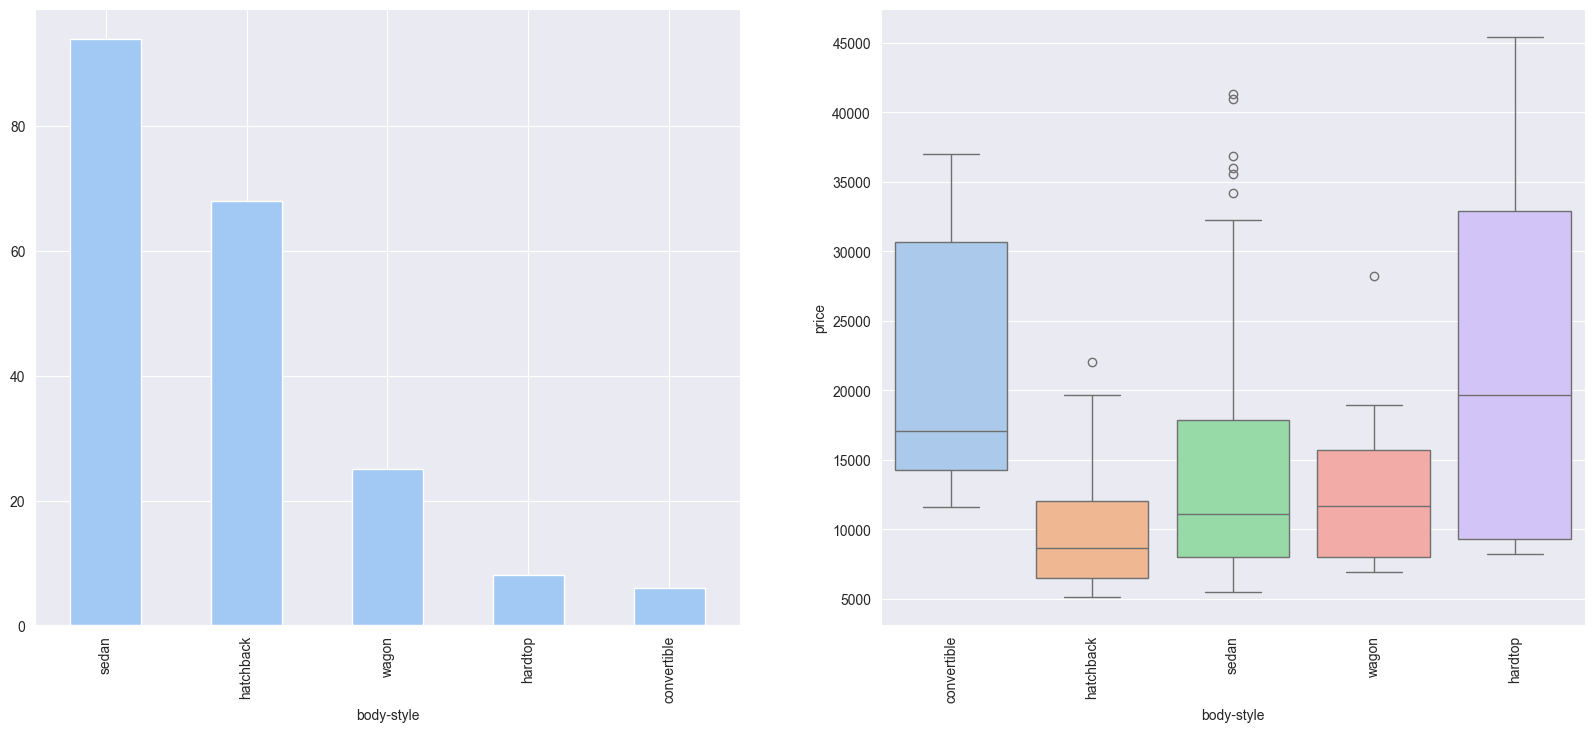

In [60]:
col = 'body-style'
plt.figure(figsize=(20,8))
    
plt.subplot(1,2,1)
df[col].value_counts().plot(kind='bar')
    
plt.subplot(1,2,2)
ax = sns.boxplot(data=df, x=col, y='price', hue=col)
ax.tick_params(axis='x', labelrotation=90)
    
plt.show()

Possiamo osservare che sedan (berlina) e hatchback (compatta) sono le tipologie di auto più presenti, mentre in termini di boxplot abbiamo anche qui una discreta sovrapposizione. In termini di prezzo, le compatte sono più concentrate nella fascia bassa, dove sono presenti anche le berline e le wagon (station wagon). Quelle decappottabili hanno un prezzo minimo leggermente superiore, mentre quelle con tettuccio rigido hanno un range molto vasto.

In [61]:
col = 'drive-wheels'
plt.figure(figsize=(20,8))
    
plt.subplot(1,2,1)
df[col].value_counts().plot(kind='bar')
    
plt.subplot(1,2,2)
ax = sns.boxplot(data=df, x=col, y='price', hue=col)
ax.tick_params(axis='x', labelrotation=90)
    
plt.show()

Le vetture con trazione anteriore sono molte di più di quelle a trazione posteriore, mentre le quattro ruote motrici sono scarsamente presenti nel dataset. Si può notare che una trazione anteriore è un buon indicatore del prezzo della vettura, mentre è più difficile distinguere tra trazione posteriore e quattro ruote motrici.

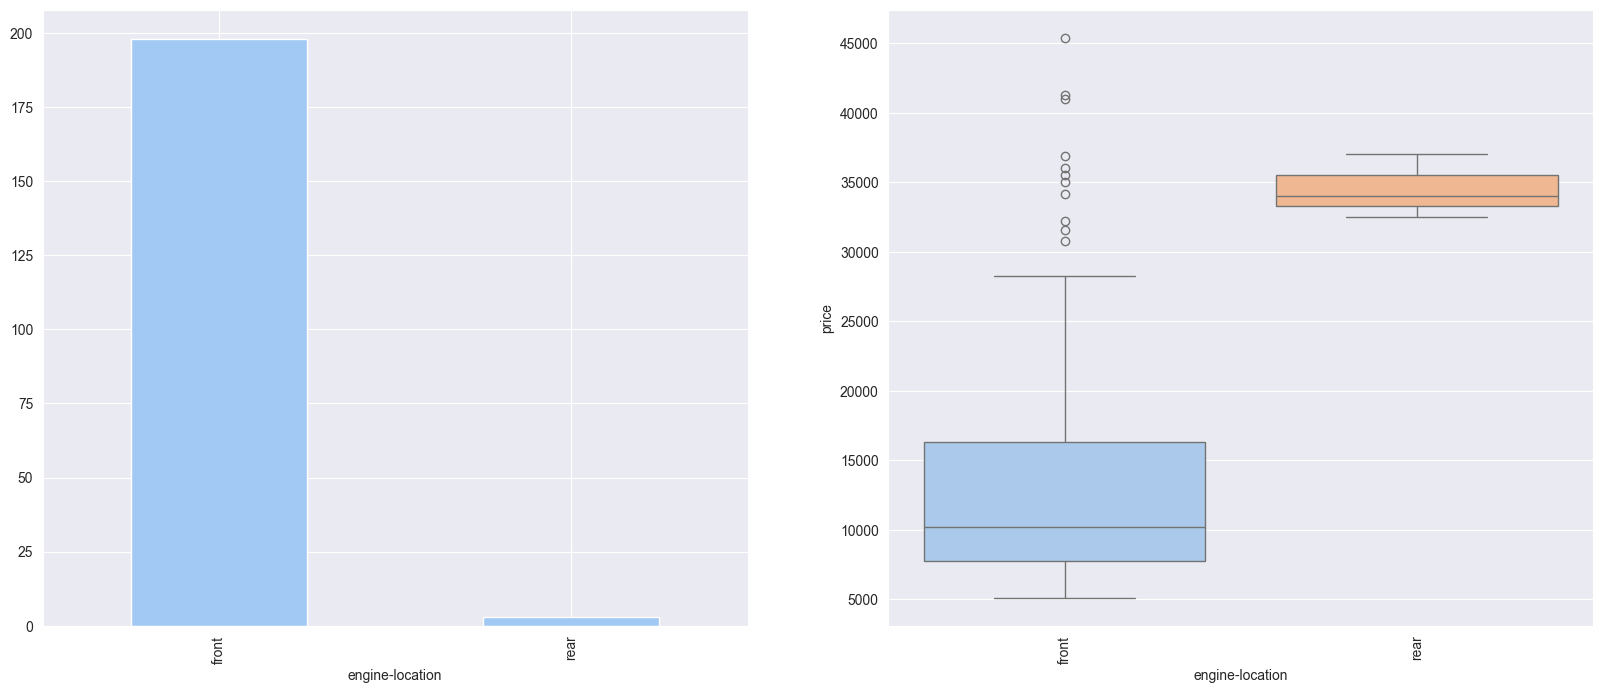

In [62]:
col = 'engine-location'
plt.figure(figsize=(20,8))
    
plt.subplot(1,2,1)
df[col].value_counts().plot(kind='bar')
    
plt.subplot(1,2,2)
ax = sns.boxplot(data=df, x=col, y='price', hue=col)
ax.tick_params(axis='x', labelrotation=90)
    
plt.show()

La posizione del motore sembrerebbe essere un ottimo predittore. Tuttavia, non ci si deve far ingannare: le vetture con motore nella parte posteriore sono una parte quasi trascurabile del dataset e, pertanto, l'indicazione del prezzo in base a questa feature potrebbe non essere corretta (statistica insufficiente).

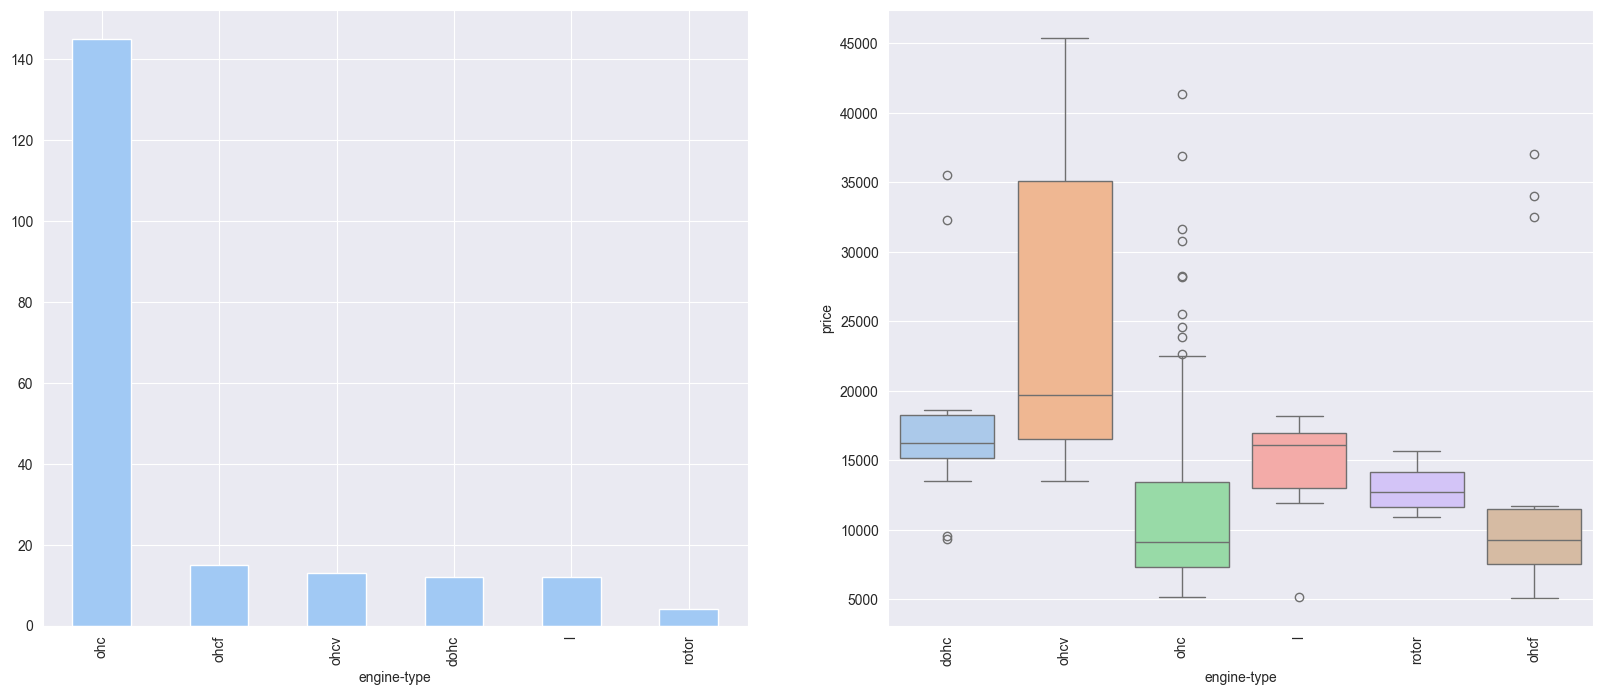

In [63]:
col = 'engine-type'
plt.figure(figsize=(20,8))
    
plt.subplot(1,2,1)
df[col].value_counts().plot(kind='bar')
    
plt.subplot(1,2,2)
ax = sns.boxplot(data=df, x=col, y='price', hue=col)
ax.tick_params(axis='x', labelrotation=90)
    
plt.show()

Per la tipologia di motore, abbiamo un dataset fortemente sbilanciato verso 'ohc', mentre le altre tipologie sono abbastanza uniformi. Come prezzi, non possiamo apprezzare una distinzione netta, anche se alcune categorie hanno una bassa sovrapposizione per cui potrebbe essere una feature da tenere in considerazione in seconda battuta.

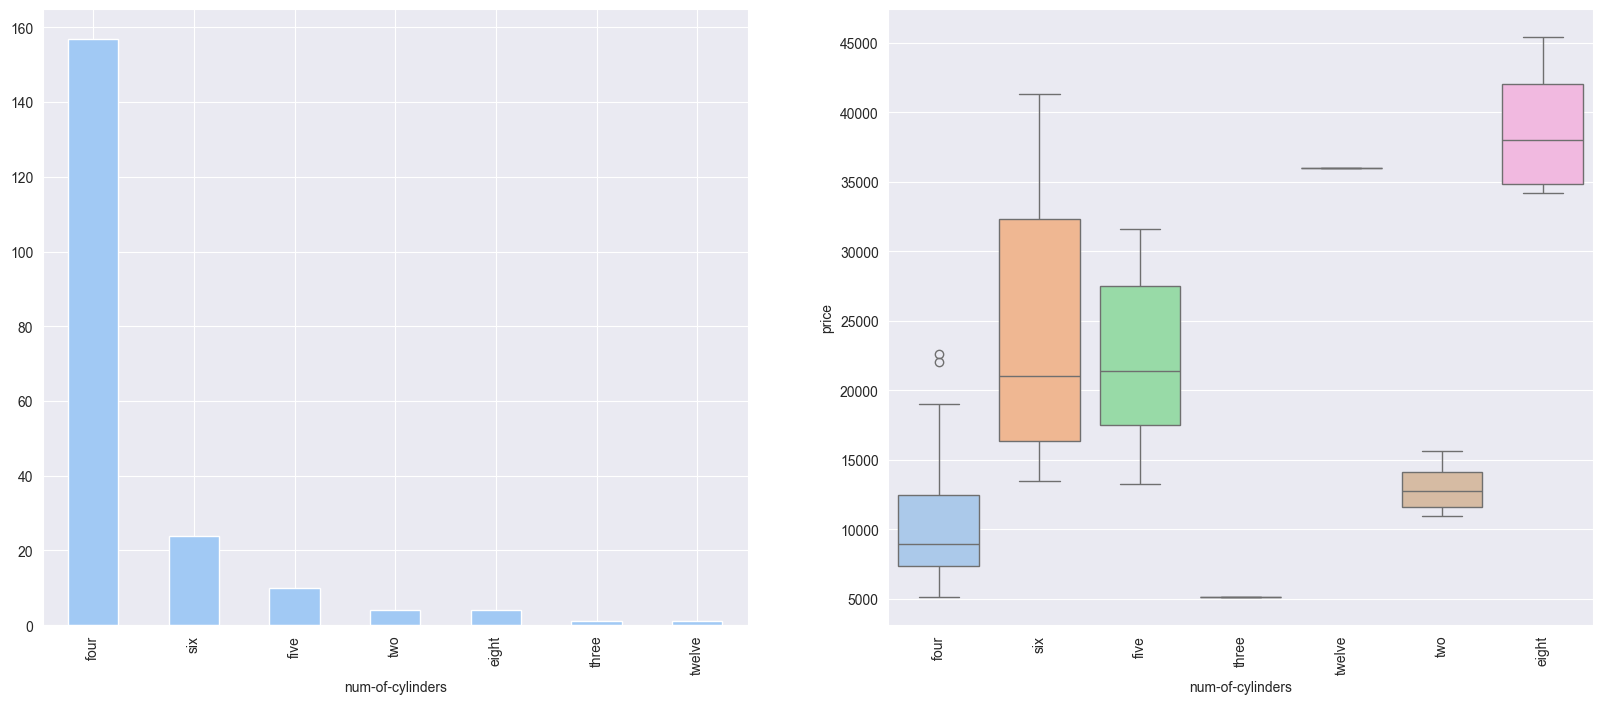

In [64]:
col = 'num-of-cylinders'
plt.figure(figsize=(20,8))
    
plt.subplot(1,2,1)
df[col].value_counts().plot(kind='bar')
    
plt.subplot(1,2,2)
ax = sns.boxplot(data=df, x=col, y='price', hue=col)
ax.tick_params(axis='x', labelrotation=90)
    
plt.show()

Le macchine con 4 cilindri sono nettamente di più delle altre, per cui anche qui le informazioni sono molto sbilanciate. Per quanto riguarda il prezzo, si nota una discreta distizione tra 3, 2 o 4, 5 0 6 e 8 o 12 cilindri: si potrebbe anche pensare di raggruppare i dati in base a questi valori in una feature modificata per renderlo più interpretabile.

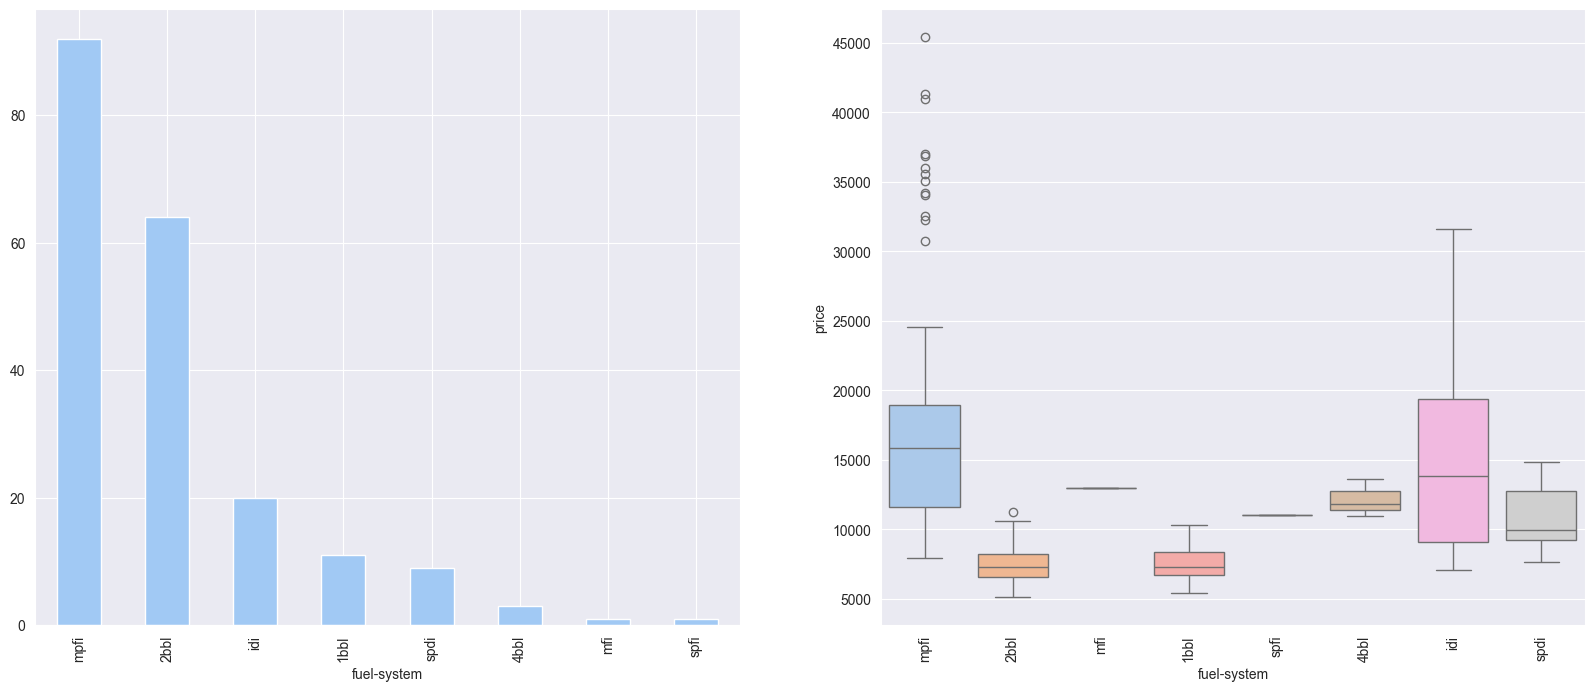

In [65]:
col = 'fuel-system'
plt.figure(figsize=(20,8))
    
plt.subplot(1,2,1)
df[col].value_counts().plot(kind='bar')
    
plt.subplot(1,2,2)
ax = sns.boxplot(data=df, x=col, y='price', hue=col)
ax.tick_params(axis='x', labelrotation=90)
    
plt.show()

Per finire, il sistema di alimentazione ha due valori molto più presenti rispetto agli altri. Per predire il prezzo, gli unici casi che si distinguono in parte sono 2bbl e 1bbl.

## 3.3 Pivot table e heatmap

Le pivot table sono delle tabelle a doppia entrata che permettono di fornire delle indicazioni utili, in particolare sulla possibile variabile di predizione. Per esempio, consideriamo il costruttore e calcoliamo il prezzo medio. Il metodo [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) raggruppa il dataframe su cui è chiamato in base ad una feature; su questo dataframe, si può chiamare una funzione che calcola un risultato in base alla seconda feature. L'argomento **as_index** indica se riportare la feature del raggruppamento come indice oppure no.

In [66]:
df_group = df[['make','price']].groupby(['make'],as_index=True).mean()
df_group

price
make                       
alfa-romeo     15498.333333
audi           17859.166667
bmw            26118.750000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.500000
jaguar         34600.000000
mazda          10652.882353
mercedes-benz  33647.000000
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.500000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818

In [67]:
df_group = df[['make','price']].groupby(['make'],as_index=False).mean()
df_group

make         price
0      alfa-romeo  15498.333333
1            audi  17859.166667
2             bmw  26118.750000
3       chevrolet   6007.000000
4           dodge   7875.444444
5           honda   8184.692308
6           isuzu   8916.500000
7          jaguar  34600.000000
8           mazda  10652.882353
9   mercedes-benz  33647.000000
10        mercury  16503.000000
11     mitsubishi   9239.769231
12         nissan  10415.666667
13        peugeot  15489.090909
14       plymouth   7963.428571
15        porsche  31400.500000
16        renault   9595.000000
17           saab  15223.333333
18         subaru   8541.250000
19         toyota   9885.812500
20     volkswagen  10077.500000
21          volvo  18063.181818

Da questa tabella, possiamo anche fare dei grafici:

<Axes: xlabel='make'>

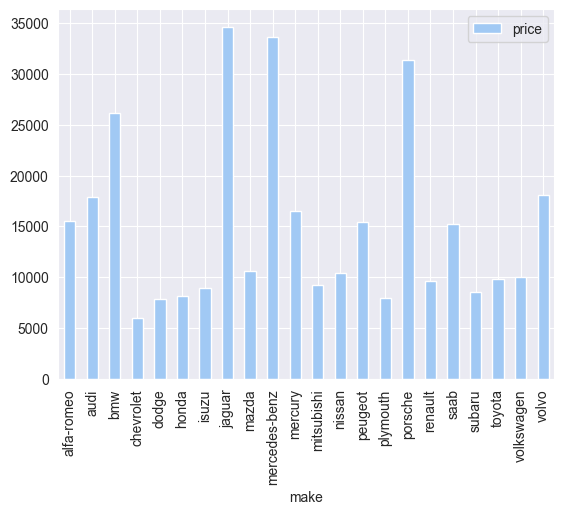

In [68]:
df_group.plot(kind='bar', x='make')

Prendiamo in considerazione anche il tipo di carburante come altro esempio:

In [69]:
df_group = df[['fuel-type','price']].groupby(['fuel-type'],as_index=False).mean()
df_group

fuel-type        price
0    diesel  15838.15000
1       gas  12916.40884

Il tipo di vettura:

In [70]:
df_group = df[['body-style','price']].groupby(['body-style'],as_index=False).mean()
df_group

body-style         price
0  convertible  21890.500000
1      hardtop  22208.500000
2    hatchback   9957.441176
3        sedan  14459.755319
4        wagon  12371.960000

Il numero di porte:

In [71]:
df_group = df[['num-of-doors','price']].groupby(['num-of-doors'],as_index=False).mean()
df_group

num-of-doors         price
0         four  13498.034783
1          two  12818.127907

Le ruote motrici:

In [72]:
df_group = df[['drive-wheels','price']].groupby(['drive-wheels'],as_index=False).mean()
df_group

drive-wheels         price
0          4wd  10241.000000
1          fwd   9244.779661
2          rwd  19757.613333

E, per finire, la posizione del motore:

In [73]:
df_group = df[['engine-location','price']].groupby(['engine-location'],as_index=False).mean()
df_group

engine-location         price
0           front  12884.085859
1            rear  34528.000000

Possono essere molto utili anche le **pivot table**. Per esempio, osserviamo il prezzo medio in base a tipo di vettura e ruote motrici. Si procede in modo simile, indicando però due feature per il raggruppamento:

In [74]:
df_group = df[['drive-wheels','body-style','price']].groupby(['drive-wheels','body-style'],as_index=False).mean()
df_group

drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9811.800000
7           fwd        wagon   9997.333333
8           rwd  convertible  23949.600000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  14337.777778
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222

Chiediamo poi a Python di rendere questa tabella una tabella a doppia entrata (pivot table appunto) indicando cosa va su righe e colonne tramite il metodo [pivot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html): 

In [75]:
df_group = df_group.pivot(index='drive-wheels',columns='body-style')
df_group

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Da una pivot table, è estremamente semplice passare ad una heatmap:

In [76]:
sns.heatmap(df_group, annot=True, cmap='Blues')
plt.show()

Le pivot table e le heatmap permettono di valutare sia numericamente sia graficamente le correlazioni tra una o più feature categorica e la variabile di predizione.

Per quanto riguarda le feature numeriche, gli scatter plot sono lo strumento più utile. In questo grafico, ogni punto rappresenta un'osservazione ed è molto utile per capire se esiste una qualche **correlazione** tra variabili, in particolare tra una feature e la variabile dipendente. 

Ad esempio, valutiamo visivamente la correlazione tra engine-size e price, che possiamo sospettare sarà significativa:

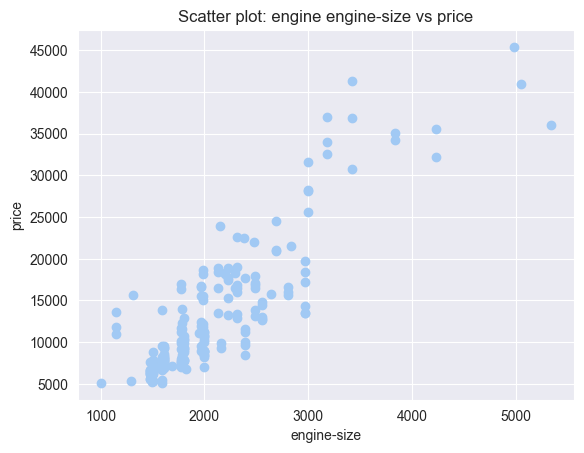

In [77]:
col = 'engine-size'
dep_var = 'price'

plt.scatter(x=df[col], y=df[dep_var])

plt.title(f'Scatter plot: engine {col} vs {dep_var}')
plt.ylabel(f'{dep_var}')
plt.xlabel(f"{col}")

plt.show()

Sembra che effettivamente vi sia una certa correlazione tra le due variabili...valutiamola ulteriormente sia graficamente sia quantitativamente.

Per il primo punto, utilizziamo un diverso tipo di grafico che si può ottenere tramite il modulo seaborn. Si tratta di uno scatterplot in cui viene anche inserita la linea di regressione ([documentazione](https://seaborn.pydata.org/generated/seaborn.regplot.html)). La fascia presente nel grafico rappresenta un intervallo di confidenza.

<Axes: xlabel='engine-size', ylabel='price'>

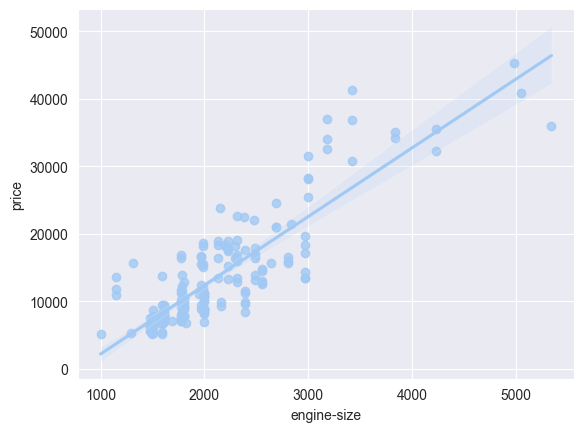

In [78]:
sns.regplot(x=col, y=dep_var, data=df)

Dal punto di vista numerico, possiamo chiaramente calcolare la correlazione. Il metodo [corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) fornisce di default l'indice di correlazione di Pearson:

In [79]:
df[[col, dep_var]].corr()

engine-size     price
engine-size     1.000000  0.872335
price           0.872335  1.000000

L'indice di correlazione di Pearson è sempre compreso tra -1 e 1. Il segno indica se le variabili sono correlate positivamente o negativamente
- $r_{x,y}>0$: correlazione positiva, quando  aumenta, i valori di  tendono ad crescere
- $r_{x,y}<0$: correlazione negativa, quando  aumenta, i valori di  tendono a diminuire

Il modulo dell'indice denota la forza della correlazione:
- $r_{x,y}\approx -1$: correlazione negativa forte, in cui i valori sono quasi su una linea con pendenza negativa
- $r_{x,y}\approx 1$: correlazione positiva forte, in cui i valori sono quasi su una linea con pendenza positiva
- $r_{x,y}\approx 0$: correlazione debole, con valori poco o per nulla correlati

Nel caso analizzato sopra, abbiamo una correlazione positiva forte tra le due variabili, come ci si aspettava.

Chiamiamo questo metodo sull'intero dataframe con le feature numeriche:

In [80]:
df_numeric.corr()

symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.466264   -0.535987 -0.365404   
normalized-losses   0.466264           1.000000   -0.056661  0.019424   
wheel-base         -0.535987          -0.056661    1.000000  0.876024   
length             -0.365404           0.019424    0.876024  1.000000   
width              -0.242423           0.086802    0.814507  0.857170   
height             -0.550160          -0.373737    0.590742  0.492063   
curb-weight        -0.233118           0.099404    0.782097  0.880665   
engine-size        -0.110581           0.112360    0.572027  0.685025   
bore               -0.140019          -0.029862    0.493244  0.608971   
stroke             -0.008153           0.055045    0.158018  0.123952   
compression-ratio  -0.182196          -0.114713    0.250313  0.159733   
horsepower          0.075819           0.217299    0.371147  0.579821   
peak-rpm            0.279740           0.239543   -0.360305 -0.285970   
city-kml           -0.035527          -0.225016   -0.470606 -0.665192   
highway-kml         0.036233          -0.181877   -0.543304 -0.698142   
price              -0.082391           0.133999    0.584642  0.690628   

                      width    height  curb-weight  engine-size      bore  \
symboling         -0.242423 -0.550160    -0.233118    -0.110581 -0.140019   
normalized-losses  0.086802 -0.373737     0.099404     0.112360 -0.029862   
wheel-base         0.814507  0.590742     0.782097     0.572027  0.493244   
length             0.857170  0.492063     0.880665     0.685025  0.608971   
width              1.000000  0.306002     0.866201     0.729436  0.544885   
height             0.306002  1.000000     0.307581     0.074694  0.180449   
curb-weight        0.866201  0.307581     1.000000     0.849072  0.644060   
engine-size        0.729436  0.074694     0.849072     1.000000  0.572609   
bore               0.544885  0.180449     0.644060     0.572609  1.000000   
stroke             0.188822 -0.060663     0.167438     0.205928 -0.055390   
compression-ratio  0.189867  0.259737     0.156433     0.028889  0.001263   
horsepower         0.615077 -0.087027     0.757976     0.822676  0.566936   
peak-rpm          -0.245800 -0.309974    -0.279361    -0.256733 -0.267392   
city-kml          -0.633531 -0.049800    -0.749543    -0.650546 -0.582027   
highway-kml       -0.680635 -0.104812    -0.794889    -0.679571 -0.591309   
price              0.751265  0.135486     0.834415     0.872335  0.543155   

                     stroke  compression-ratio  horsepower  peak-rpm  \
symboling         -0.008153          -0.182196    0.075819  0.279740   
normalized-losses  0.055045          -0.114713    0.217299  0.239543   
wheel-base         0.158018           0.250313    0.371147 -0.360305   
length             0.123952           0.159733    0.579821 -0.285970   
width              0.188822           0.189867    0.615077 -0.245800   
height            -0.060663           0.259737   -0.087027 -0.309974   
curb-weight        0.167438           0.156433    0.757976 -0.279361   
engine-size        0.205928           0.028889    0.822676 -0.256733   
bore              -0.055390           0.001263    0.566936 -0.267392   
stroke             1.000000           0.187871    0.098267 -0.063561   
compression-ratio  0.187871           1.000000   -0.214514 -0.435780   
horsepower         0.098267          -0.214514    1.000000  0.107885   
peak-rpm          -0.063561          -0.435780    0.107885  1.000000   
city-kml          -0.033956           0.331425   -0.822214 -0.115413   
highway-kml       -0.034636           0.268465   -0.804575 -0.058598   
price              0.082269           0.071107    0.809575 -0.101616   

                   city-kml  highway-kml     price  
symboling         -0.035527     0.036233 -0.082391  
normalized-losses -0.225016    -0.181877  0.133999  
wheel-base        -0.470606    -0.543304  0.584642  
length            -0.665192   

Naturalmente, si tratta di una matrice simmetrica e la diagonale principale contiene sempre 1 (autocorrelazione).

Guardiamo un esempio di correlazione negativa: i consumi in città (km/l) sono negativamente correlati con la dimensione del motore. E' lecito attendersi che motori maggiori abbiano infatti consumi maggiori, quindi un minor valore di km/l:

<Axes: xlabel='engine-size', ylabel='city-kml'>

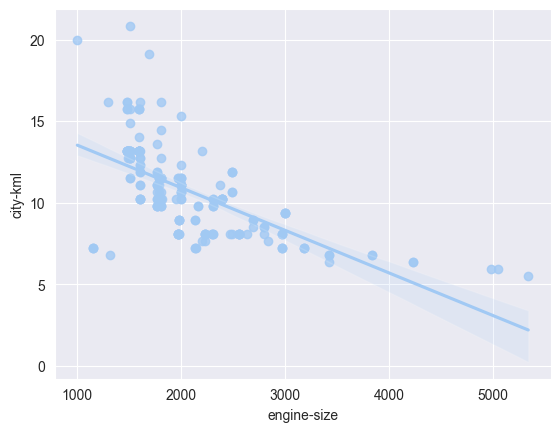

In [81]:
col = 'engine-size'
dep_var = 'city-kml'

sns.regplot(x=col, y=dep_var, data=df)

Se osserviamo il diametro dei cilindri (bore) e il fattore di compressione (compression-ratio) abbiamo invece una correlazione fondamentalmente assente:

In [82]:
col = 'compression-ratio'
dep_var = 'bore'

sns.regplot(x=col, y=dep_var, data=df)

<Axes: xlabel='compression-ratio', ylabel='bore'>

Osserviamo i consumi ed il prezzo:

<Axes: xlabel='city-kml', ylabel='price'>

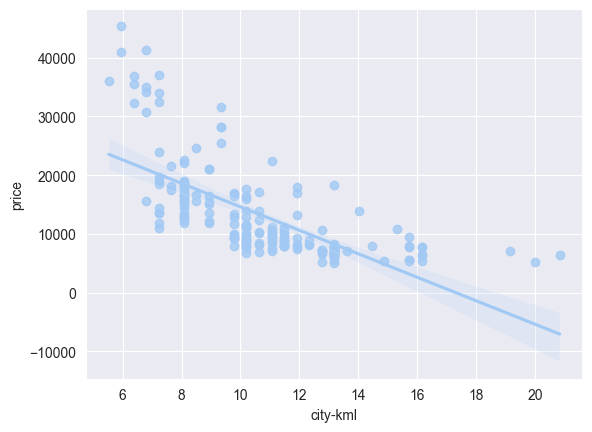

In [83]:
col = 'city-kml'
dep_var = 'price'

sns.regplot(x=col, y=dep_var, data=df)

<Axes: xlabel='highway-kml', ylabel='price'>

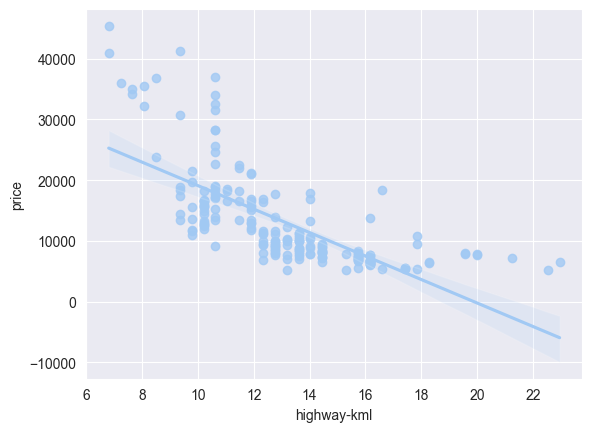

In [84]:
col = 'highway-kml'
dep_var = 'price'

sns.regplot(x=col, y=dep_var, data=df)

In [85]:
df[['city-kml', 'highway-kml', 'price']].corr()

city-kml  highway-kml     price
city-kml     1.000000     0.972044 -0.686571
highway-kml  0.972044     1.000000 -0.704692
price       -0.686571    -0.704692  1.000000

Abbiamo una correlazione relativamente forte ma negativa: se la macchina percorre più km a parità di litri, il prezzo diminuisce. Potrebbe sembrare poco intuitivo, ma una possibile motivazione è che le macchine con consumi più limitati siano quelle più a buon mercato, mentre le macchine con consumi maggiori sono tipicamente quelle con cilindrate e prestazioni superiori che hanno un costo maggiore.

Infine, un altro strumento utile per visualizzare tutte le correlazioni in modo visivo è la scatterplot matrix, ottenibile con [pariplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html):

In [86]:
sns.pairplot(df[['city-kml', 'highway-kml', 'engine-size', 'compression-ratio', 'price']])

In merito alla correlazione, va sottolineato che:
- la **correlazione** è una misura della dipendenza di una variabile dall'altra;
- la **causalità** è la relazione tra causa ed effetto tra due variabili.

**Correlation is not causation**: anche se correlate, due variabili possono non essere legate da causalità. La correlazione è più semplice da misurare in modo numerico, mentre la causalità potrebbe richiedere degli esperimenti indipendenti.

In precedenza, abbiamo calcolato il coefficiente di correlazione di Pearson che, appunto, misura numericamente la correlazione tra due variabili. Tuttavia, è anche opportuno avere una indicazione del **P-value**: rappresenta la probabilità che la correlazione misurata tra le due variabili sia significativa da un punto di vista statistico. 

Tipicamente, si sceglie un valore di 0.05, che indica una confidenza del 95% che la correlazione sia significativa. In generale:
- $p<0.001$: **forte** evidenza che la correlazione è significativa;
- $0.001<p<0.05$: **moderata** evidenza che la correlazione è significativa;
- $0.05<p<0.1$: **debole** evidenza che la correlazione è significativa;
- $0.1<p$: **nessuna** evidenza che la correlazione è significativa.

Per ottenere la misura del P-value, ricorriamo alla classe stats del modulo scipy:


In [87]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['city-kml'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.6865710067844684  with a P-value of P = 2.3211320655672357e-29


Possiamo notare che tra price e citi-kml il valore di correlazione di Pearson è quello misurato sopra con il metodo corr(). Abbiamo però anche il valore del P-value che è dell'ordine di $10^{-29}$! Si tratta di una correlazione indubbiamente forte tra queste due variabili. Il valore della correlazione è poi abbastanza alto, anche se non eccelso.

Dato che il nostro obiettivo potrebbe essere quello di predire il prezzo di una vettura tramite algoritmi di ML, ottenere il coefficiente di correlazione e il P-value tra il prezzo e ogni altra variabile numerica sarebbe un'ottimo punto di partenza. In questo modo, possiamo selezionare le variabili più signficative per la predizione. Infatti, con ML e AI non sempre aggiungere feature e informazioni porta ad un miglioramento delle prestazioni; potrebbe anzi accadere il contrario. 

In [88]:
columns = df_numeric.columns[:-1]  # selezioniamo tutte le feature tranne il prezzo
for col in columns:
    pearson_coef, p_value = stats.pearsonr(df[col], df['price'])
    print(f"[{col}]: corr = {pearson_coef} | p = {p_value}")

[symboling]: corr = -0.08239118716962354 | p = 0.24491487657164873
[normalized-losses]: corr = 0.13399873429274334 | p = 0.0578974935270313
[wheel-base]: corr = 0.5846418222655083 | p = 8.076488270732554e-20
[length]: corr = 0.6906283804483645 | p = 8.016477466157796e-30
[width]: corr = 0.7512653440522685 | p = 9.200335510477929e-38
[height]: corr = 0.1354863075680595 | p = 0.05514627325101304
[curb-weight]: corr = 0.8344145257702847 | p = 2.189577238893392e-53
[engine-size]: corr = 0.8723351674455186 | p = 9.26549162219736e-64
[bore]: corr = 0.5431553832626603 | p = 8.049189483935318e-17
[stroke]: corr = 0.08226928855325813 | p = 0.24561612487745846
[compression-ratio]: corr = 0.07110732668194146 | p = 0.31581101887292395
[horsepower]: corr = 0.8095745670036555 | p = 6.369057428260921e-48
[peak-rpm]: corr = -0.10161587407588152 | p = 0.151176916514453
[city-kml]: corr = -0.6865710067844684 | p = 2.3211320655672357e-29
[highway-kml]: corr = -0.7046922650589531 | p = 1.7495471144475574e

Osservando i P-value, possiamo notare che molte feature sono fortemente rilevanti da un punto di vista statistico. Tuttavia, possiamo già scartare le seguenti in quanto debilmente signficative (o per nulla): height, stroke, peak-rpm, normalized-losses, compression-ratio. In ogni caso, queste feature avevano anche un coefficiente di correlazione piuttosto basso.

Osservando la correlazione, le seguenti feature potrebbero essere inserite in seconda battuta in un eventuale algoritmo di ML/AI in quanto poco correlate col prezzo: wheel-base, length, bore, city-kml. Le altre hanno una correlazione abbastanza forte e pertanto potrebbero essere i migliori predittori numerici a disposizione. 


Per le variabili categoriche è più complesso dare delle indicazioni finali. Tuttavia, potremmo considerare:
- make
- fuel-type
- aspiration
- num-of-doors
- body-style
- drive-wheels
- engine-location

## 3.4 Visualizzazione

Concludiamo la parte di EDA con alcune visualizzazioni avanzate sia per quanto riguarda dati a molte dimensioni sia per comunicare in modo accattivante delle informazioni (eventualmente anche su una applicazione web).

### 3.4.1 Parallel chart

Si tratta di un grafico in cui si possono confrontare diverse osservazioni individuali rispetto alle loro feature numeriche. Ogni asse verticale rappresenta una variabile e potrebbe avere una sua scala.

Per comodità, prendiamo solo alcune feature numeriche del nostro dataset: length, width, price, city-kml, engine-size, curb-weight.

In [89]:
df_sample = df[['length', 'width', 'city-kml', 'engine-size', 'curb-weight', 'price']]
df_sample

length    width   city-kml  engine-size  curb-weight    price
0    428.752  162.814   8.928571     2130.310     5618.340  13495.0
1    428.752  162.814   8.928571     2130.310     5618.340  16500.0
2    434.848  166.370   8.078231     2490.824     6224.715  16500.0
3    448.564  168.148  10.204082     1786.183     5153.085  13950.0
4    448.564  168.656   7.653061     2228.632     6226.920  17450.0
..       ...      ...        ...          ...          ...      ...
196  479.552  175.006   9.778912     2310.567     6509.160  16845.0
197  479.552  174.752   8.078231     2310.567     6723.045  19045.0
198  479.552  175.006   7.653061     2834.951     6641.460  21485.0
199  479.552  175.006  11.054422     2376.115     7093.485  22470.0
200  479.552  175.006   8.078231     2310.567     6751.710  22625.0

[201 rows x 6 columns]

E' possibile realizzare un parallel chart anche con matplotlib, ma plotly.express fornisce una visualizzazione molto migliore tramite la funzione [parallel_coordinates()](https://plotly.com/python/parallel-coordinates-plot/):

In [90]:
import plotly.express as px

fig = px.parallel_coordinates(df_sample, color="price", labels={"length": "Length",
                "width": "Width", "city-kml": "City km/l", "engine-size": "Engine size", "curb-weight": "Curb weight"},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

Possiamo vedere come il colore legato al prezzo, come definito nella creazione del grafico, aiuti notevolmente a valutare anche visivamente l'andamento di questa caratteristica rispetto alle altre feature del dataset. Ad esmepio notiamo, come già evidenziato in precedenza, come vetture con elevati consumi (city-kml basso) abbiano un costo maggiore, oppure che la lunghezza e la larghezza della vettura hanno un impatto simile sul prezzo (le linee sono quasi tutte orizzontali tra le due feature); in effetti, i loro coefficienti di correlazione sono pari a 0.69 e 0.75.  

Per un'analisi più nel dettaglio, si potrebbe anche decidere di visualizzare un parallel chart dove mostriamo gli andamenti medi di queste grandezze in funzione del costruttore.

In [101]:
df_group = df[['make', 'length','width', 'city-kml', 'engine-size', 'curb-weight', 'price']].groupby(['make'],as_index=False).mean()
df_group

make      length       width   city-kml  engine-size  \
0      alfa-romeo  430.784000  163.999333   8.645125  2250.481333   
1            audi  469.307333  174.879000   8.219955  2141.234667   
2             bmw  468.630000  168.846500   8.237670  2734.580625   
3       chevrolet  385.910667  158.750000  17.431973  1316.422333   
4           dodge  408.911778  162.983333  11.904762  1682.398667   
5           honda  408.353846  163.536923  12.918629  1627.355154   
6           isuzu  435.991000  161.290000  10.204082  1884.505000   
7          jaguar  500.295333  177.630667   6.094104  4599.284667   
8           mazda  433.846941  166.594118  10.929372  1687.861000   
9   mercedes-benz  495.966750  180.498750   7.865646  3711.655500   
10        mercury  453.136000  172.720000   8.078231  2294.180000   
11     mitsubishi  426.798154  165.744769  10.596546  1938.708154   
12         nissan  434.311778  165.325778  11.479592  2095.715222   
13        peugeot  485.486364  173.712909   9.547001  2225.652545   
14       plymouth  418.846000  163.249429  11.965500  1741.704000   
15        porsche  429.006000  167.195500   7.440476  3002.917750   
16        renault  455.041000  169.037000   9.778912  2163.084000   
17           saab  473.964000  168.910000   8.645125  1982.827000   
18         subaru  428.900167  164.973000  11.196145  1754.774583   
19         toyota  436.713313  165.330187  11.692177  1946.980438   
20     volkswagen  438.234667  166.666333  12.152778  1757.505750   
21          volvo  479.552000  172.627636   9.005875  2331.423182   

    curb-weight         price  
0   5820.465000  15498.333333  
1   6082.860000  17859.166667  
2   6459.271875  26118.750000  
3   3874.185000   6007.000000  
4   4743.690000   7875.444444  
5   4623.376154   8184.692308  
6   5590.777500   8916.500000  
7   8880.270000  34600.000000  
8   5066.700882  10652.882353  
9   8150.231250  33647.000000  
10  6416.550000  16503.000000  
11  5252.140385   9239.769231  
12  5292.857500  10415.666667  
13  7102.305000  15489.090909  
14  4896.990000   7963.428571  
15  6113.362500  31400.500000  
16  5555.497500   9595.000000  
17  6053.827500  15223.333333  
18  5107.331250   8541.250000  
19  5382.611719   9885.812500  
20  5166.682500  10077.500000  
21  6698.589545  18063.181818

Siccome questa funzione prende in ingresso solo dati numerici, dobbiamo rimuovere la feature 'make' e usarla come legenda.

In [102]:
cars = df_group['make']
del df_group['make']
fig = px.parallel_coordinates(df_group, color="price", labels={"length": "Length",
                "width": "Width", "city-kml": "City km/l", "engine-size": "Engine size", "curb-weight": "Curb weight"},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

Per il momento, questo modulo non supporta l'introduzione di una legenda: se la si volesse, si dovrebbe inserire manualmente, recuperando l'indicazione della riga di una vettura dalla tabella ottenuta sopra.

Per quanto riguarda le feature categoriche, si può ricorrere alla funzione [parallel_categories()](https://plotly.com/python/parallel-categories-diagram/). Di nuovo, prendiamo un sottoinsieme delle feature, questa volta categoriche:

In [113]:
df_sample = df[['make', 'fuel-type', 'num-of-doors', 'body-style', 'drive-wheels', 'price']]
df_sample

make fuel-type num-of-doors   body-style drive-wheels    price
0    alfa-romeo       gas          two  convertible          rwd  13495.0
1    alfa-romeo       gas          two  convertible          rwd  16500.0
2    alfa-romeo       gas          two    hatchback          rwd  16500.0
3          audi       gas         four        sedan          fwd  13950.0
4          audi       gas         four        sedan          4wd  17450.0
..          ...       ...          ...          ...          ...      ...
196       volvo       gas         four        sedan          rwd  16845.0
197       volvo       gas         four        sedan          rwd  19045.0
198       volvo       gas         four        sedan          rwd  21485.0
199       volvo    diesel         four        sedan          rwd  22470.0
200       volvo       gas         four        sedan          rwd  22625.0

[201 rows x 6 columns]

In [114]:
fig = px.parallel_categories(df, dimensions=['make', 'fuel-type', 'num-of-doors', 'body-style', 'drive-wheels'],
                color="price", color_continuous_scale=px.colors.sequential.Inferno,
                labels={'make':'Maker', 'fuel-type':'Fuel type', 'num-of-doors':'# doors', 'body-style':'Body style',
                        'drive-wheels':'Drive wheels'})
fig.show()

In effetti ci sono molti costruttori: potremmo decidere di fare più grafici in base a dei sottoinsiemi. Per esempio, selezioniamo toyota, volkswagen, nissan e alfa-romeo:

In [115]:
df_filtered = df_sample[df_sample['make'].isin(['toyota', 'volkswagen', 'nissan', 'alfa-romeo'])].reset_index(drop=True)
df_filtered

make fuel-type num-of-doors   body-style drive-wheels    price
0   alfa-romeo       gas          two  convertible          rwd  13495.0
1   alfa-romeo       gas          two  convertible          rwd  16500.0
2   alfa-romeo       gas          two    hatchback          rwd  16500.0
3       nissan       gas          two        sedan          fwd   5499.0
4       nissan    diesel          two        sedan          fwd   7099.0
..         ...       ...          ...          ...          ...      ...
60  volkswagen       gas          two  convertible          fwd  11595.0
61  volkswagen       gas          two    hatchback          fwd   9980.0
62  volkswagen       gas         four        sedan          fwd  13295.0
63  volkswagen    diesel         four        sedan          fwd  13845.0
64  volkswagen       gas         four        wagon          fwd  12290.0

[65 rows x 6 columns]

In [116]:
fig = px.parallel_categories(df_filtered, dimensions=['make', 'fuel-type', 'num-of-doors', 'body-style', 'drive-wheels'],
                color="price", color_continuous_scale=px.colors.sequential.Inferno,
                labels={'make':'Maker', 'fuel-type':'Fuel type', 'num-of-doors':'# doors', 'body-style':'Body style',
                        'drive-wheels':'Drive wheels'})
fig.show()

### 3.4.2 Andrews curve

Si tratta di un altro grafico per mostrare dati multi-dimensionali su una singola figura. Ogni osservazione viene proiettata su un vettore dove i valori di ciascuna feature sono moltiplicati per una specifica sinusoide ([link](https://en.wikipedia.org/wiki/Andrews_plot)). Questo tipo di trasformazione sta portando i dati multi-dimensionali in uno spazio con minori dimensioni mantenendo la distanza relativa tra le osservazioni e la varianza. Se delle curve sono simili in questo grafico, allora si tratta di osservazioni simili anche nello spazio multi-dimensionale da cui siamo partiti.

Per implementarla in Python, ricorriamo alla funzione [pandas.plotting.andrews_curves](https://pandas.pydata.org/docs/reference/api/pandas.plotting.andrews_curves.html). Siccome abbiamo una associazione con delle sinusoidi, lo applichiamo a feature numeriche. Per comodità prendiamo di nuovo un sottoinsieme delle feature numeriche.

Per prima cosa, grafichiamo questa curva per due singoli costruttori, separatamente:

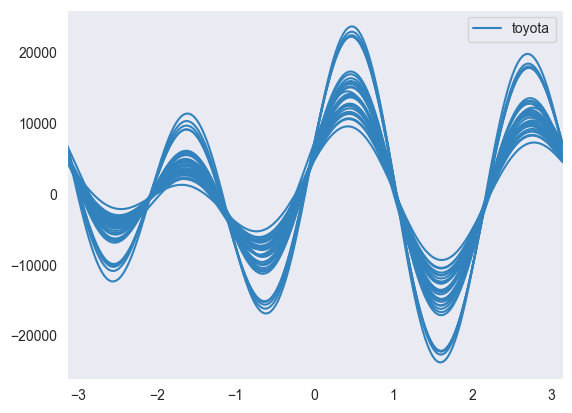

In [130]:
df_sample = df[['make', 'length', 'width', 'city-kml', 'engine-size', 'curb-weight', 'price']]
df_filtered = df_sample[df_sample['make'].isin(['toyota'])].reset_index(drop=True)
pd.plotting.andrews_curves(df_filtered, 'make', colormap='tab20c')  
plt.show()

In [131]:
df_sample = df[['make', 'length', 'width', 'city-kml', 'engine-size', 'curb-weight', 'price']]
df_filtered = df_sample[df_sample['make'].isin(['nissan'])].reset_index(drop=True)
pd.plotting.andrews_curves(df_filtered, 'make', colormap='tab20c')  
plt.show()

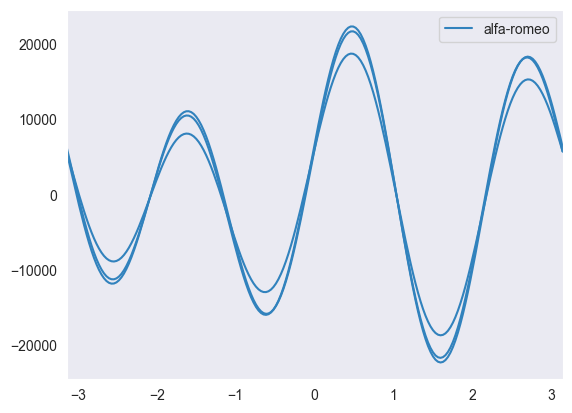

In [132]:
df_sample = df[['make', 'length', 'width', 'city-kml', 'engine-size', 'curb-weight', 'price']]
df_filtered = df_sample[df_sample['make'].isin(['alfa-romeo'])].reset_index(drop=True)
pd.plotting.andrews_curves(df_filtered, 'make', colormap='tab20c')  
plt.show()

In [133]:
df_sample = df[['make', 'length', 'width', 'city-kml', 'engine-size', 'curb-weight', 'price']]
df_filtered = df_sample[df_sample['make'].isin(['chevrolet'])].reset_index(drop=True)
pd.plotting.andrews_curves(df_filtered, 'make', colormap='tab20c')  
plt.show()

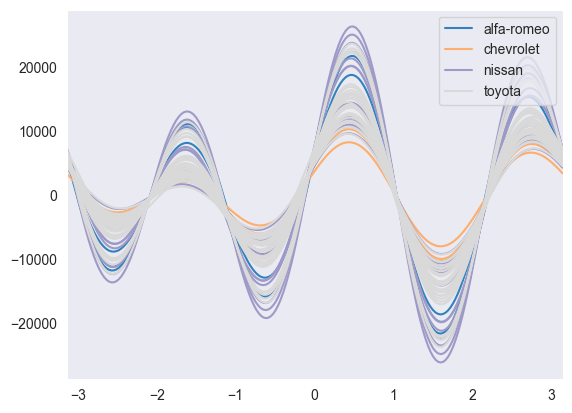

In [134]:
df_sample = df[['make', 'length', 'width', 'city-kml', 'engine-size', 'curb-weight', 'price']]
df_filtered = df_sample[df_sample['make'].isin(['toyota', 'chevrolet', 'nissan', 'alfa-romeo'])].reset_index(drop=True)
pd.plotting.andrews_curves(df_filtered, 'make', colormap='tab20c')  
plt.show()

### 3.4.3 Bubble plot

Si tratta di una variante dello scetter plot che mostra una terza dimensione: i punti dello scatter plot sono sostituiti da delle bolle, che hanno una dimensione legata alla terza variabile introdotta (nota come peso). Vediamo come crearli prendendo il nostro dataset di vetture e graficando:
- engine-size sulle x
- length sulle y
- price come peso

Creiamo 3 bubble plot per chevrolet, alfa-romeo e volkswagen. Per la loro creazione, la cosa più semplice è ricorrere a plotly.express e alla funzione [scatter](https://plotly.com/python/line-and-scatter/) ([qui](https://plotly.com/python/bubble-charts/) ci sono degli esempi di bubble plot).

In [242]:
df_sample = df[['make', 'length', 'engine-size', 'price']]
df_filtered = df_sample[df_sample['make'].isin(['chevrolet', 'alfa-romeo', 'volkswagen'])].reset_index(drop=True)

In [243]:
import plotly.express as px

fig = px.scatter(df_filtered, x="length", y="engine-size",
	         size="price", color="make",
            log_x=False, size_max=30)
fig.show()

In [244]:
df_filtered = df_sample[df_sample['make'].isin(['toyota', 'audi', 'nissan'])].reset_index(drop=True)
fig = px.scatter(df_filtered, x="length", y="engine-size",
	         size="price", color="make",
            log_x=False, size_max=30)
fig.show()

## 3.5 Visualizzazioni aggiuntive

Per completare il notebook e, in particolare, la parte relativa alla visualizzazione avanzata, ricorriamo ad un altro dataset per comodità (interpretazione più facile delle feature e presenza di una evoluzione temporale). 

In [166]:
df = pd.read_csv('00_datasets/3gpp_data.csv')
df

date    CT    RAN    SA
0     2014-02-10     0      3     0
1     2014-02-11     0      3     0
2     2014-02-12     0      3     0
3     2014-02-13     0      3     0
4     2014-02-14     0      3     0
...          ...   ...    ...   ...
3910  2024-10-25  1880  18532  4400
3911  2024-10-26  1880  18532  4400
3912  2024-10-27  1880  18532  4400
3913  2024-10-28  1880  18532  4400
3914  2024-10-29  1880  18532  4404

[3915 rows x 4 columns]

Possiamo notare come la data sia una stringa contenente anno, mese e giorno. Convertiamolo in date time

In [167]:
df['date']= pd.to_datetime(df['date'])
df

date    CT    RAN    SA
0    2014-02-10     0      3     0
1    2014-02-11     0      3     0
2    2014-02-12     0      3     0
3    2014-02-13     0      3     0
4    2014-02-14     0      3     0
...         ...   ...    ...   ...
3910 2024-10-25  1880  18532  4400
3911 2024-10-26  1880  18532  4400
3912 2024-10-27  1880  18532  4400
3913 2024-10-28  1880  18532  4400
3914 2024-10-29  1880  18532  4404

[3915 rows x 4 columns]

Per sicurezza stampiamo i data type:

In [147]:
df.dtypes

date    datetime64[ns]
CT               int64
RAN              int64
SA               int64
dtype: object

Benissimo, sono tutti datetime. Possiamo passare ad alcune visualizzazioni.

### 3.5.1 Area plot

In [155]:
df.plot.area(
    x='date',
    y=['RAN', 'SA', 'CT'],
    stacked=False,
    figsize=(20, 10),
    alpha=0.25
)  

plt.title('Submitted 3GPP Tdocs on NTN')
plt.ylabel('number of documents')
plt.xlabel('year')

plt.show()

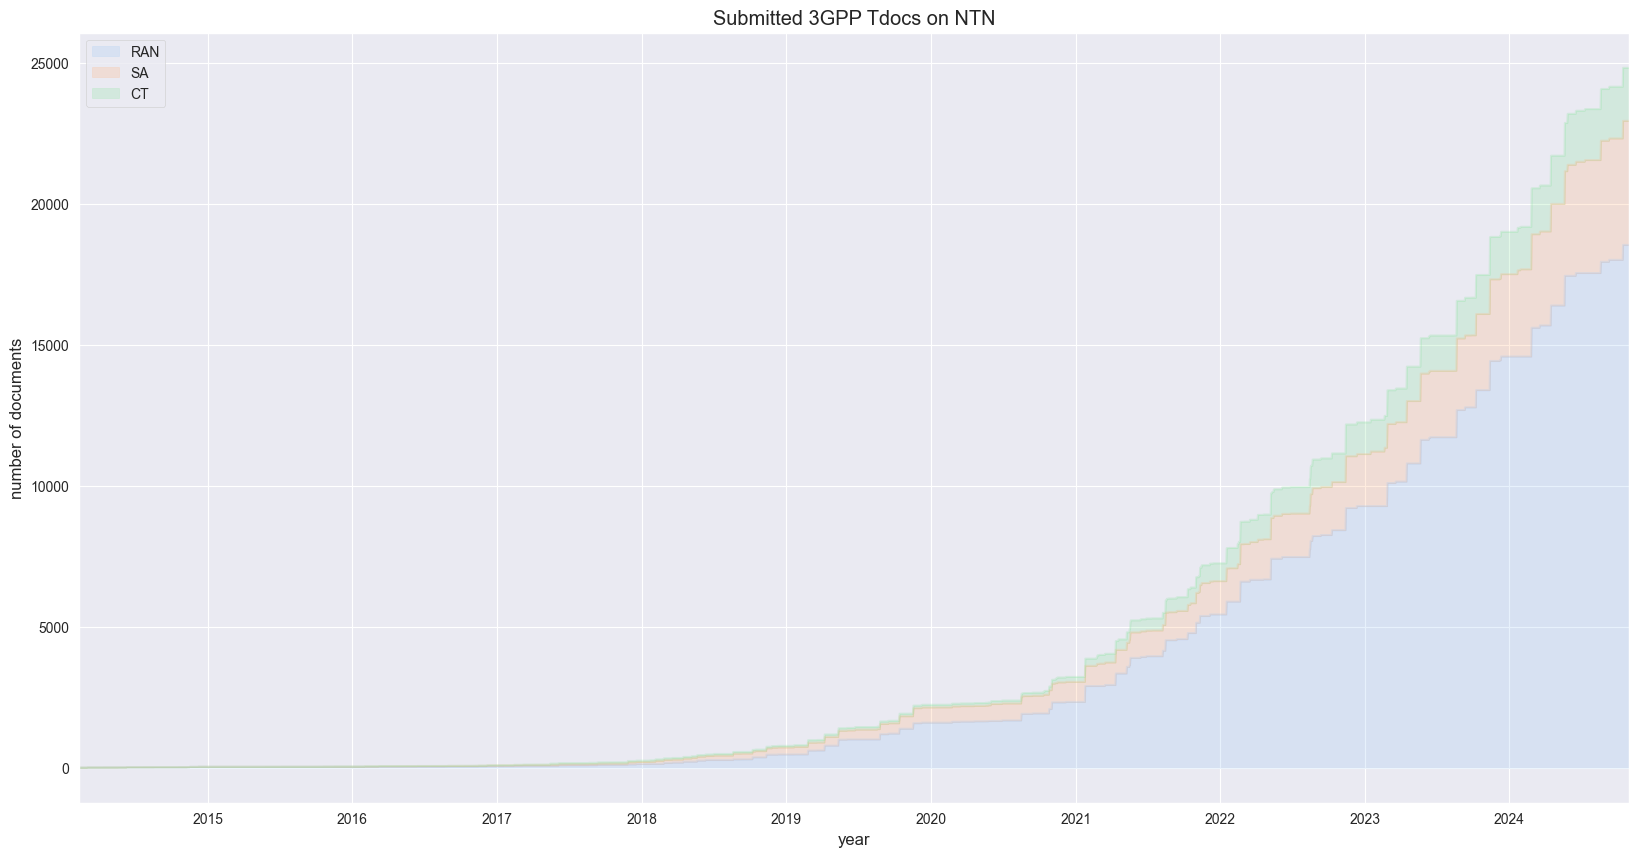

In [156]:
df.plot.area(
    x='date',
    y=['RAN', 'SA', 'CT'],
    stacked=True,
    figsize=(20, 10),
    alpha=0.25
)  

plt.title('Submitted 3GPP Tdocs on NTN')
plt.ylabel('number of documents')
plt.xlabel('year')

plt.show()

### 3.5.2 Pie chart

Per questo tipo di grafico, sommiamo tutti i documenti per TSG e creiamo il grafico a torta.

In [171]:
df_sum = pd.DataFrame(df.iloc[:, 1:].sum(), columns = ['total'])
df_sum
# df_sum

total
CT    1586561
RAN  14678634
SA    3317819

Per poter leggere gli indici di riga come colonna, per la visualizzazione, implementiamo la seguente operazione:

In [172]:
df_sum['TSG'] = df_sum.index
df_sum

total  TSG
CT    1586561   CT
RAN  14678634  RAN
SA    3317819   SA

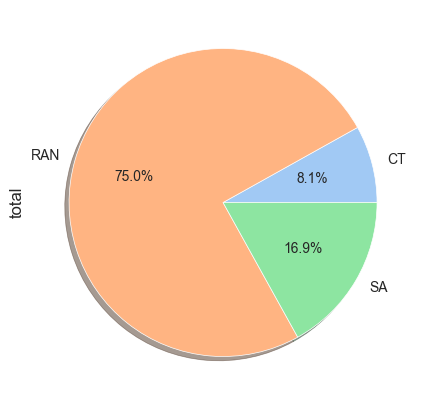

In [177]:
df_sum['total'].plot.pie(
    autopct='%1.1f%%', # add in percentages
    shadow=True,       # add shadow      
    figsize=(5, 5)
)

plt.show()

E' anche possibile mettere in rilievo una o più fette specifiche, indicate tramite una lista che riporta l'offset per staccarle:

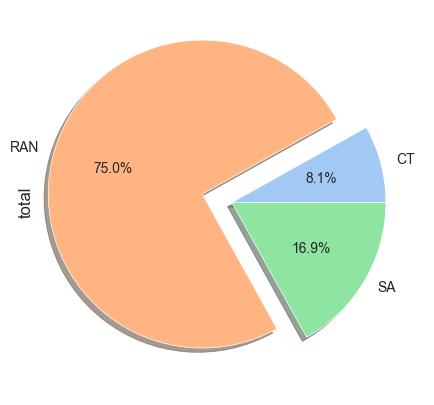

In [180]:
explode_list = [0.0, 0.2, 0.0] # ratio for each continent with which to offset each wedge.
df_sum['total'].plot.pie(
    autopct='%1.1f%%', # add in percentages
    shadow=True,       # add shadow      
    figsize=(5, 5),
    explode=explode_list
)

plt.show()